# Earthquake Tsunami Prediction Analysis
## DATA1030 Final Project
**Student:** Justin Xiao  
**Institution:** Brown University  
**Date:** December 15, 2025     
**Dataset:** [Kaggle](https://www.kaggle.com/datasets/warcoder/earthquake-dataset)  
**GitHub Repository:** [Earthquake-Tsunami](https://github.com/JustinXre2020/Earthquake-Tsunami)

In [1550]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1551]:
# Load both datasets
df1 = pd.read_csv('../data/dataset/earthquake_1995-2023.csv')
df2 = pd.read_csv('../data/dataset/earthquake_data.csv')

print(f"Dataset 1 (1995-2023): {df1.shape}")
print(f"Dataset 2 (recent data): {df2.shape}")

# Check column overlap
print(f"\nDataset 1 columns: {df1.columns.tolist()}")
print(f"\nDataset 2 columns: {df2.columns.tolist()}")

# Find common columns for merging
common_cols = list(set(df1.columns) & set(df2.columns))
print(f"\nCommon columns: {common_cols}")

# Select relevant columns for analysis (keep only features present in both)
analysis_columns = ['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude']

# Filter to common columns that exist in both datasets
df1_filtered = df1[analysis_columns].copy()
df2_filtered = df2[analysis_columns].copy()

# Combine datasets
df = pd.concat([df1_filtered, df2_filtered], ignore_index=True)

# Remove duplicates in case some events appear in both datasets
df = df.drop_duplicates()

print(f"Combined dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset 1 (1995-2023): (1000, 19)
Dataset 2 (recent data): (782, 19)

Dataset 1 columns: ['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami', 'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude', 'longitude', 'location', 'continent', 'country']

Dataset 2 columns: ['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami', 'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude', 'longitude', 'location', 'continent', 'country']

Common columns: ['date_time', 'continent', 'magType', 'alert', 'dmin', 'gap', 'magnitude', 'net', 'depth', 'latitude', 'title', 'location', 'mmi', 'longitude', 'sig', 'nst', 'cdi', 'country', 'tsunami']
Combined dataset shape: (1000, 11)

First few rows:


,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960


In [1552]:
# Basic dataset information
print("Dataset Information:")
print(df.info())
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   cdi        1000 non-null   int64  
 2   mmi        1000 non-null   int64  
 3   tsunami    1000 non-null   int64  
 4   sig        1000 non-null   int64  
 5   nst        1000 non-null   int64  
 6   dmin       1000 non-null   float64
 7   gap        1000 non-null   float64
 8   depth      1000 non-null   float64
 9   latitude   1000 non-null   float64
 10  longitude  1000 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 93.8 KB
None

Column Names:
['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude']

Data Types:
magnitude    float64
cdi            int64
mmi            int64
tsunami        int64
sig            int64
nst            int64
dmin         float64
gap          float64
dept

In [1553]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())
print("\nTarget Variable Distribution:")
print(df['tsunami'].value_counts())
print(f"\nTsunami occurrence rate: {df['tsunami'].mean()}")

Summary Statistics:
         magnitude          cdi         mmi      tsunami          sig  \
count  1000.000000  1000.000000  1000.00000  1000.000000  1000.000000   
mean      6.940150     3.605000     6.02700     0.325000   847.915000   
std       0.438148     3.328972     1.43399     0.468609   301.802632   
min       6.500000     0.000000     1.00000     0.000000   650.000000   
25%       6.600000     0.000000     5.00000     0.000000   691.000000   
50%       6.800000     4.000000     6.00000     0.000000   744.000000   
75%       7.100000     7.000000     7.00000     1.000000   874.250000   
max       9.100000     9.000000    10.00000     1.000000  2910.000000   

               nst         dmin          gap        depth     latitude  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    193.918000     1.125174    20.926290    74.612541     4.315554   
std     239.045858     2.073164    24.415895   130.812590    26.633320   
min       0.000000     0.0

In [1554]:
# Missing values analysis
print("Missing Values Analysis:")
missing_counts = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])
print(f"\nRows with ANY missing values: {df.isnull().any(axis=1).sum()} ({df.isnull().any(axis=1).sum()/len(df)*100}%)")
print(f"Total data points with missing values: {df.isnull().sum().sum()}")

Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

Rows with ANY missing values: 0 (0.0%)
Total data points with missing values: 0


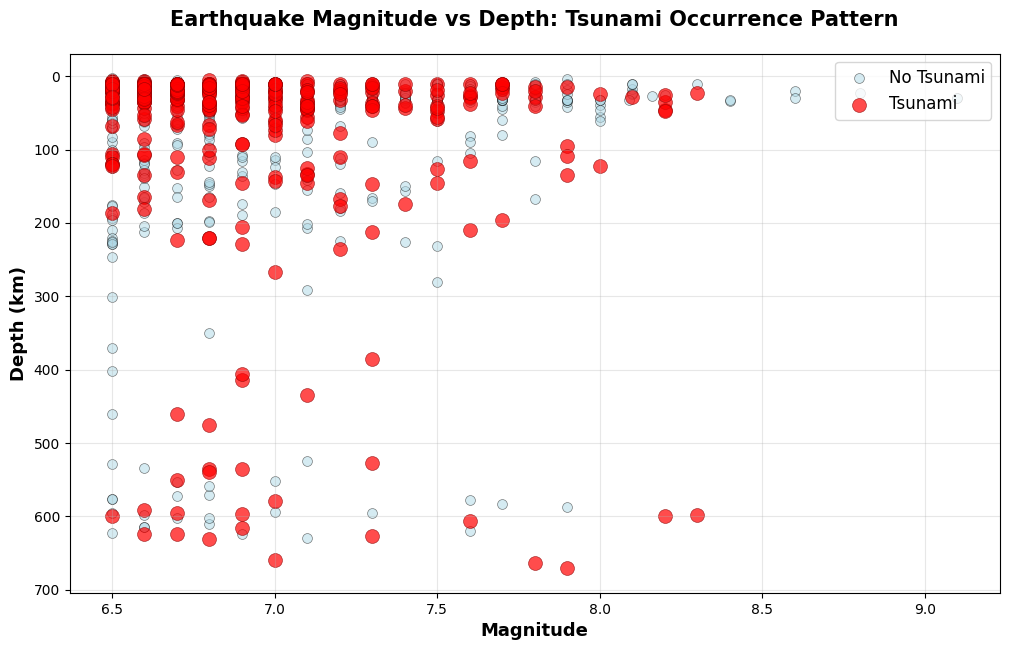

INSIGHT: Tsunamis predominantly occur with shallow earthquakes (< 100km depth)
Average depth for tsunami events: 87.93531076923077 km
Average depth for non-tsunami events: 68.19787407407408 km


In [1555]:
# Figure 1: Magnitude vs Depth (Continuous vs Continuous) - colored by tsunami
fig, ax = plt.subplots(figsize=(12, 7))

# Separate tsunami and non-tsunami events
tsunami_yes = df[df['tsunami'] == 1]
tsunami_no = df[df['tsunami'] == 0]

ax.scatter(tsunami_no['magnitude'], tsunami_no['depth'],
           alpha=0.5, s=50, c='lightblue', label='No Tsunami', edgecolors='black', linewidth=0.5)
ax.scatter(tsunami_yes['magnitude'], tsunami_yes['depth'],
           alpha=0.7, s=100, c='red', label='Tsunami', edgecolors='darkred', linewidth=0.5)

ax.set_xlabel('Magnitude', fontsize=13, fontweight='bold')
ax.set_ylabel('Depth (km)', fontsize=13, fontweight='bold')
ax.set_title('Earthquake Magnitude vs Depth: Tsunami Occurrence Pattern',
             fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='upper right')
ax.grid(True, alpha=0.3)
ax.invert_yaxis()  # Conventional to show shallow earthquakes at top

plt.show()

print("INSIGHT: Tsunamis predominantly occur with shallow earthquakes (< 100km depth)")
print(f"Average depth for tsunami events: {tsunami_yes['depth'].mean()} km")
print(f"Average depth for non-tsunami events: {tsunami_no['depth'].mean()} km")

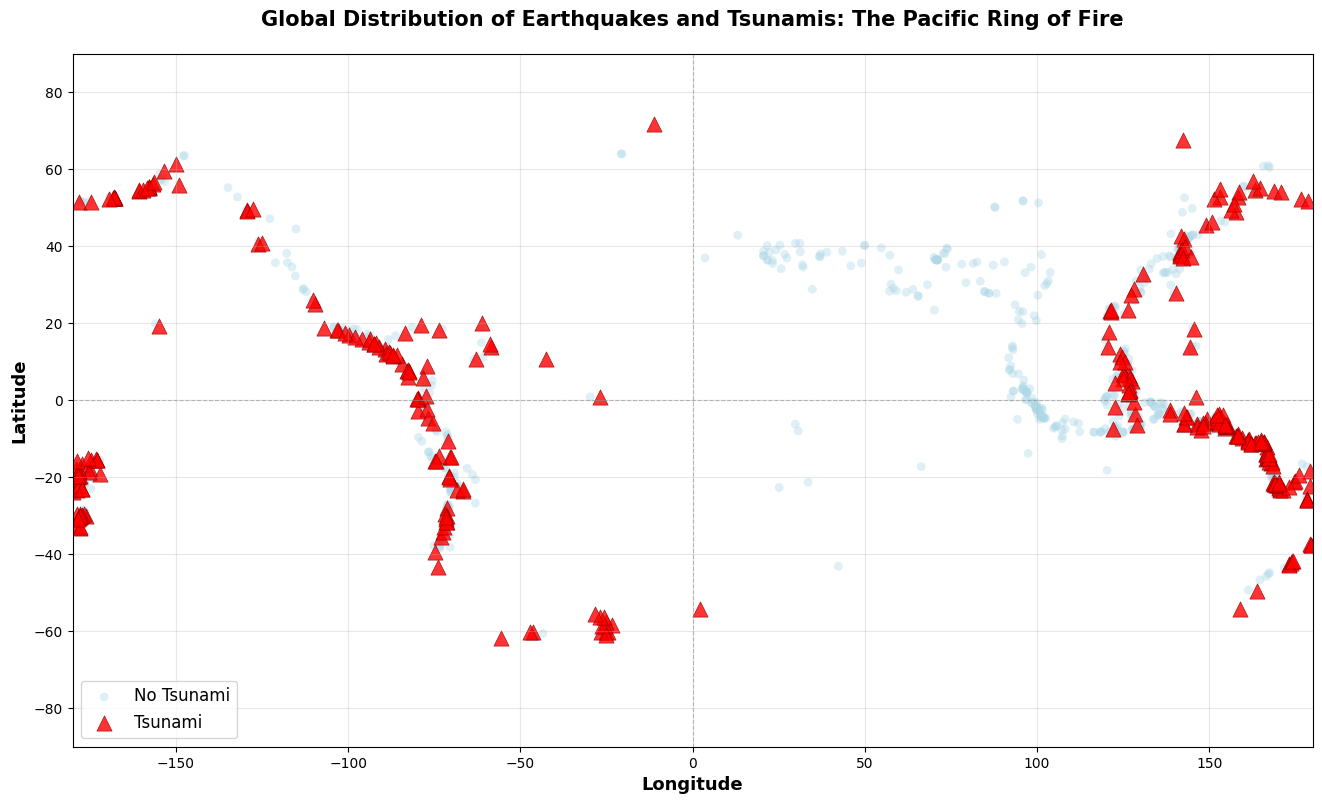

INSIGHT: Tsunamis cluster around the Pacific Ring of Fire (Pacific Ocean rim)
Tsunami events in Pacific region (lon: 100-180 or -180 to -60): 305 / 325


In [1556]:
# Figure 2: Geographic Distribution (Latitude vs Longitude) - world map view
fig, ax = plt.subplots(figsize=(16, 9))

# Plot all earthquakes
ax.scatter(tsunami_no['longitude'], tsunami_no['latitude'],
           alpha=0.4, s=40, c='lightblue', label='No Tsunami', edgecolors='none')
ax.scatter(tsunami_yes['longitude'], tsunami_yes['latitude'],
           alpha=0.8, s=120, c='red', label='Tsunami', edgecolors='darkred',
           linewidth=0.5, marker='^')

ax.set_xlabel('Longitude', fontsize=13, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=13, fontweight='bold')
ax.set_title('Global Distribution of Earthquakes and Tsunamis: The Pacific Ring of Fire',
             fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=12, loc='lower left')
ax.grid(True, alpha=0.3)
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)

# Add reference lines for equator and prime meridian
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5, linewidth=0.8)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5, linewidth=0.8)

plt.show()

print("INSIGHT: Tsunamis cluster around the Pacific Ring of Fire (Pacific Ocean rim)")
print(f"Tsunami events in Pacific region (lon: 100-180 or -180 to -60): "
      f"{((tsunami_yes['longitude'] > 100) | (tsunami_yes['longitude'] < -60)).sum()} / {len(tsunami_yes)}")

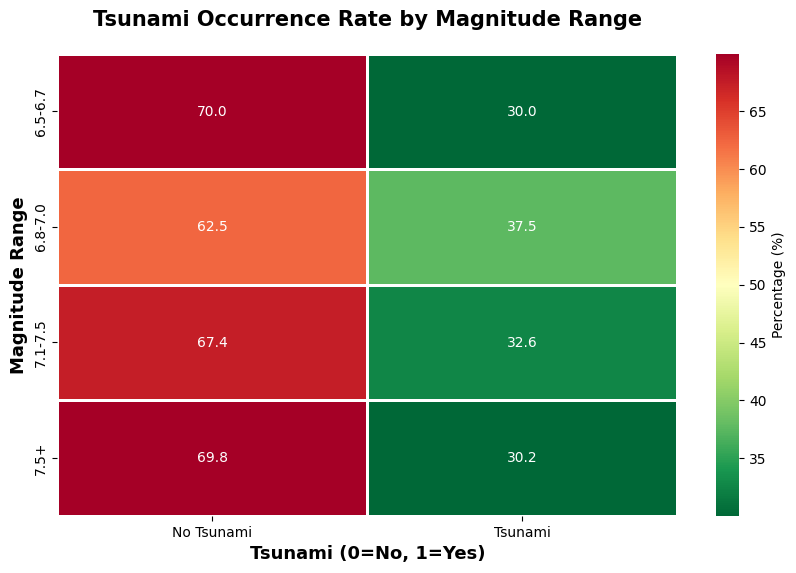

INSIGHT: Tsunami probability increases dramatically with magnitude

Tsunami rates by magnitude:
  6.5-6.7: 30.045871559633024% tsunami rate
  6.8-7.0: 37.547892720306514% tsunami rate
  7.1-7.5: 32.62032085561498% tsunami rate
  7.5+: 30.17241379310345% tsunami rate


In [1557]:
# Figure 3: Tsunami occurrence by magnitude bins (Categorical vs Categorical - heatmap style)
# Create magnitude bins
df['magnitude_bin'] = pd.cut(df['magnitude'],
                              bins=[6.4, 6.7, 7.0, 7.5, 10],
                              labels=['6.5-6.7', '6.8-7.0', '7.1-7.5', '7.5+'])

# Create crosstab
tsunami_by_mag = pd.crosstab(df['magnitude_bin'], df['tsunami'],
                              normalize='index') * 100

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(tsunami_by_mag, annot=True, fmt='.1f', cmap='RdYlGn_r',
            cbar_kws={'label': 'Percentage (%)'}, ax=ax, linewidths=2, linecolor='white')
ax.set_xlabel('Tsunami (0=No, 1=Yes)', fontsize=13, fontweight='bold')
ax.set_ylabel('Magnitude Range', fontsize=13, fontweight='bold')
ax.set_title('Tsunami Occurrence Rate by Magnitude Range',
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticklabels(['No Tsunami', 'Tsunami'], rotation=0)

plt.show()

print("INSIGHT: Tsunami probability increases dramatically with magnitude")
print(f"\nTsunami rates by magnitude:")
for idx, row in tsunami_by_mag.iterrows():
    print(f"  {idx}: {row[1]}% tsunami rate")

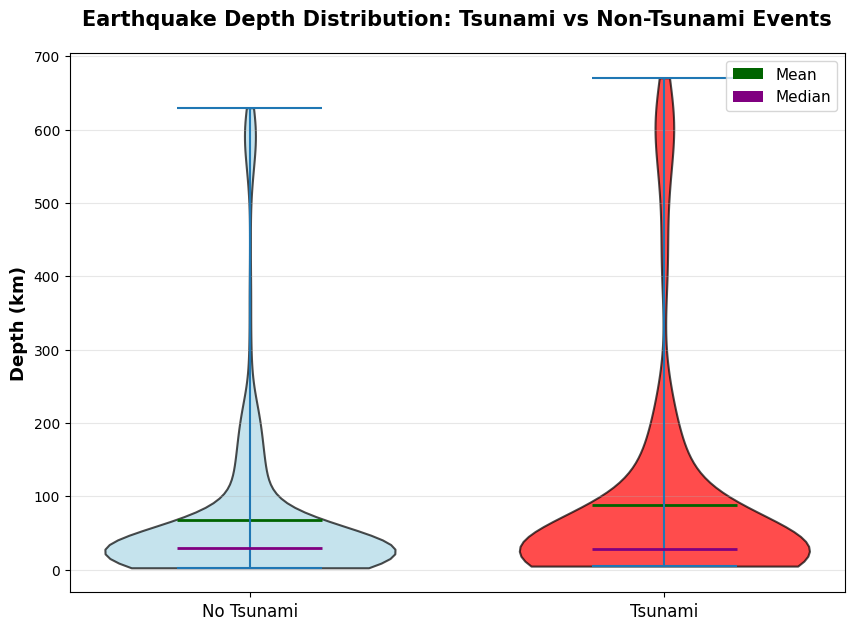

INSIGHT: Tsunami events have dramatically different depth distribution
Median depth - No Tsunami: 30.0 km
Median depth - Tsunami: 28.0 km
75th percentile depth for tsunamis: 66.0 km


In [1558]:
# Figure 4: Depth distribution by tsunami status (Categorical vs Continuous - violin plot)
fig, ax = plt.subplots(figsize=(10, 7))

# Create violin plot
parts = ax.violinplot([tsunami_no['depth'].dropna(), tsunami_yes['depth'].dropna()],
                       positions=[0, 1], showmeans=True, showmedians=True, widths=0.7)

# Customize colors
colors = ['lightblue', 'red']
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)
    pc.set_edgecolor('black')
    pc.set_linewidth(1.5)

# Customize other elements
parts['cmeans'].set_edgecolor('darkgreen')
parts['cmeans'].set_linewidth(2)
parts['cmedians'].set_edgecolor('purple')
parts['cmedians'].set_linewidth(2)

ax.set_xticks([0, 1])
ax.set_xticklabels(['No Tsunami', 'Tsunami'], fontsize=12)
ax.set_ylabel('Depth (km)', fontsize=13, fontweight='bold')
ax.set_title('Earthquake Depth Distribution: Tsunami vs Non-Tsunami Events',
             fontsize=15, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='darkgreen', label='Mean'),
                  Patch(facecolor='purple', label='Median')]
ax.legend(handles=legend_elements, loc='upper right', fontsize=11)

plt.show()

print("INSIGHT: Tsunami events have dramatically different depth distribution")
print(f"Median depth - No Tsunami: {tsunami_no['depth'].median()} km")
print(f"Median depth - Tsunami: {tsunami_yes['depth'].median()} km")
print(f"75th percentile depth for tsunamis: {tsunami_yes['depth'].quantile(0.75)} km")

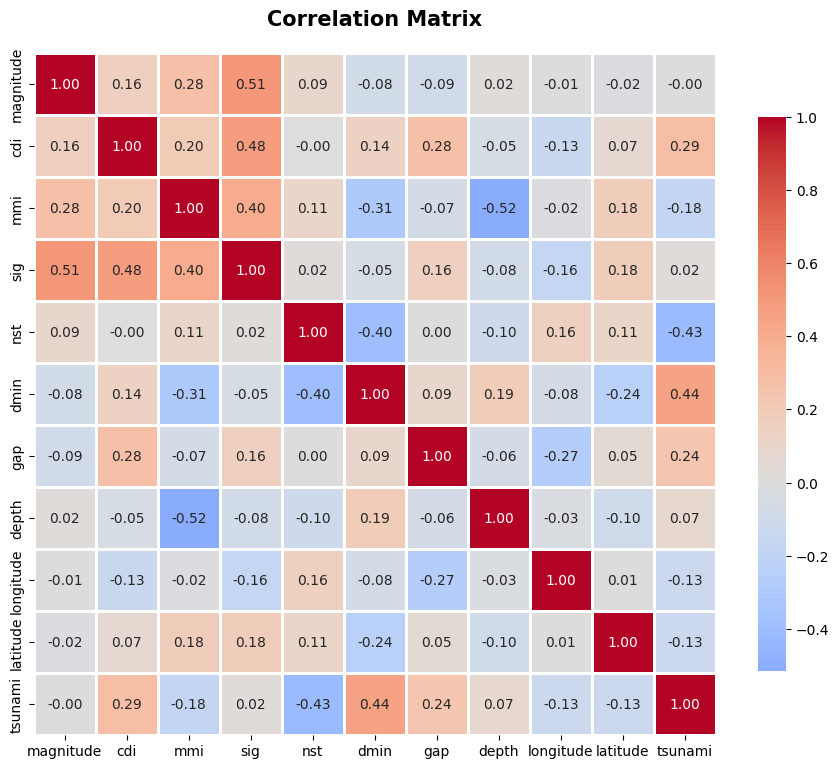

Key correlations with tsunami:
tsunami      1.000000
dmin         0.443179
cdi          0.292202
gap          0.236259
depth        0.070705
sig          0.024848
magnitude   -0.001213
latitude    -0.127002
longitude   -0.131340
mmi         -0.175441
nst         -0.426026
Name: tsunami, dtype: float64


In [1559]:
# Additional Figure: Correlation heatmap for continuous features
continuous_features = ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'longitude', 'latitude', 'tsunami']
corr_data = df[continuous_features].corr()

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix',
             fontsize=15, fontweight='bold', pad=20)

plt.show()

print("Key correlations with tsunami:")
print(corr_data['tsunami'].sort_values(ascending=False))

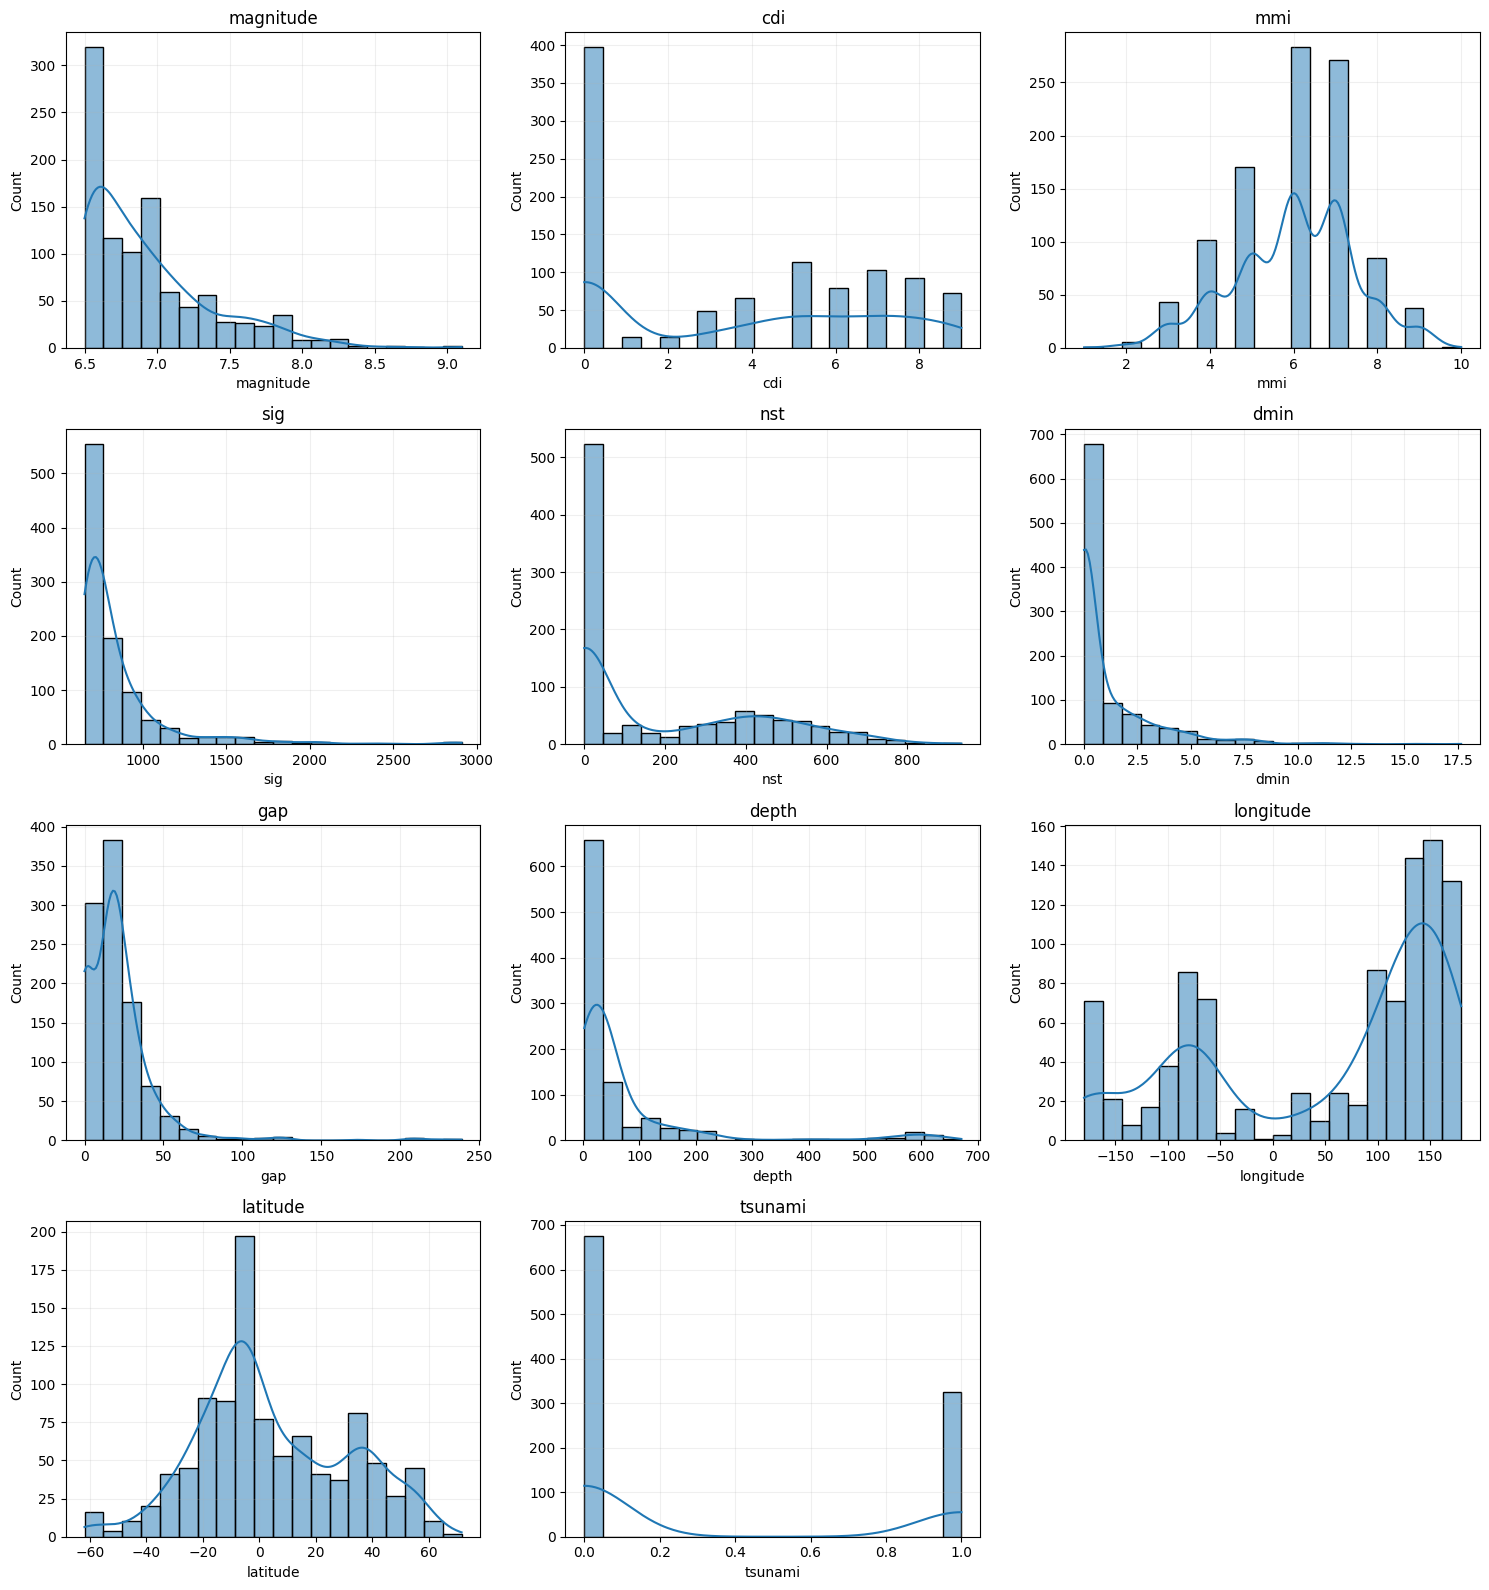

In [1560]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

df_cont_features = df[continuous_features]
num_cols = df_cont_features.columns
n = len(num_cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df_cont_features[col], bins=20, kde=True)
    plt.title(col)
    plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

# Cross-Validation Pipeline

## Data Cleaning and preprocessing

In [1561]:
# Find common columns for merging
common_cols = list(set(df1.columns) & set(df2.columns))
print(f"\nCommon columns: {common_cols}")


# Combine datasets
df = pd.concat([df1, df2], ignore_index=True)

# Remove duplicates in case some events appear in both datasets
df = df.drop_duplicates()
print(df.shape)
print(df.head())


Common columns: ['date_time', 'continent', 'magType', 'alert', 'dmin', 'gap', 'magnitude', 'net', 'depth', 'latitude', 'title', 'location', 'mmi', 'longitude', 'sig', 'nst', 'cdi', 'country', 'tsunami']
(1000, 19)
                                      title  magnitude         date_time  cdi  \
0          M 6.5 - 42 km W of Sola, Vanuatu        6.5  16-08-2023 12:47    7   
1  M 6.5 - 43 km S of Intipucá, El Salvador        6.5  19-07-2023 00:22    8   
2  M 6.6 - 25 km ESE of Loncopué, Argentina        6.6  17-07-2023 03:05    7   
3     M 7.2 - 98 km S of Sand Point, Alaska        7.2  16-07-2023 06:48    6   
4                  M 7.3 - Alaska Peninsula        7.3  16-07-2023 06:48    0   

   mmi   alert  tsunami  sig net  nst      dmin    gap magType    depth  \
0    4   green        0  657  us  114  7.177000   25.0     mww  192.955   
1    6  yellow        0  775  us   92  0.679000   40.0     mww   69.727   
2    5   green        0  899  us   70  1.634000   28.0     mww  171.371  

In [1562]:
y = df['tsunami']
X = df.loc[:, ~df.columns.isin(['tsunami'])]
print(X.head())
print(y.head())

                                      title  magnitude         date_time  cdi  \
0          M 6.5 - 42 km W of Sola, Vanuatu        6.5  16-08-2023 12:47    7   
1  M 6.5 - 43 km S of Intipucá, El Salvador        6.5  19-07-2023 00:22    8   
2  M 6.6 - 25 km ESE of Loncopué, Argentina        6.6  17-07-2023 03:05    7   
3     M 7.2 - 98 km S of Sand Point, Alaska        7.2  16-07-2023 06:48    6   
4                  M 7.3 - Alaska Peninsula        7.3  16-07-2023 06:48    0   

   mmi   alert  sig net  nst      dmin    gap magType    depth  latitude  \
0    4   green  657  us  114  7.177000   25.0     mww  192.955  -13.8814   
1    6  yellow  775  us   92  0.679000   40.0     mww   69.727   12.8140   
2    5   green  899  us   70  1.634000   28.0     mww  171.371  -38.1911   
3    6   green  860  us  173  0.907000   36.0     mww   32.571   54.3844   
4    5     NaN  820  at   79  0.879451  172.8      Mi   21.000   54.4900   

   longitude               location      continent    co

In [1563]:
# first split to separate out the test set, apply k-fold later
# cols_to_drop = [
#     'title',                     # Non-numeric description
#     'date_time',                 # Absolute timestamp
#     'location',                  # Redundant with latitude and longitude
#     'net', 'nst', 'dmin', 'gap', # Human observation-related data
#     'tsunami',                   # target variable
#     'country', 'continent',
#     'magType'
# ]
# leakage_cols = ['alert']
# X = df.drop(columns=cols_to_drop + leakage_cols)
# y = df['tsunami']

import numpy as np


def apply_feature_engineering(df):
    df = df.copy()
    
    tsunami_potential = df['magnitude'] * (100 - df['depth'].clip(0, 100)) / 100
    
    # Bin tsunami_potential into discrete categories
    bins = [-np.inf, 0.5, 3, 6, np.inf]
    labels_tp = ['none', 'low', 'medium', 'high']  # none / low / medium / high
    
    df['tsunami_potential_bin'] = pd.cut(
        tsunami_potential,
        bins=bins,
        labels=labels_tp
    ).astype(str)

    # Convert gap to ordinal bins
    # Smaller gap values indicate better coverage (higher reliability)
    # We want "smaller value -> larger weight"
    # So we map Smallest Gap -> 'excellent' -> High ordinal value
    #            Largest Gap  -> 'poor'      -> Low ordinal value
    gap_bins = [-1, 30, 90, 180, 361]
    gap_labels = ['excellent', 'good', 'fair', 'poor']
    # 0-30: excellent
    # 30-90: good
    # 90-180: fair
    # 180+: poor
    
    df['gap_bin'] = pd.cut(
        df['gap'],
        bins=gap_bins,
        labels=gap_labels
    ).astype(str)

    # Drop unnecessary columns
    cols_to_drop = [
        'nst', 'dmin', 'sig', 'title',
        'location', 'continent', 'country', 'net', 'date_time', 'alert', 
        'magType', 'depth_confidence', 'is_reliable_location', 'energy_scale',
        'gap'
    ]
    
    existing_drop_cols = [c for c in cols_to_drop if c in df.columns]
    df = df.drop(columns=existing_drop_cols)
    
    return df

X = apply_feature_engineering(X)
print(X.shape)
print(y.shape)
print(X.head())

(1000, 8)
(1000,)
   magnitude  cdi  mmi    depth  latitude  longitude tsunami_potential_bin  \
0        6.5    7    4  192.955  -13.8814   167.1580                  none   
1        6.5    8    6   69.727   12.8140   -88.1265                   low   
2        6.6    7    5  171.371  -38.1911   -70.3731                  none   
3        7.2    6    6   32.571   54.3844  -160.6990                medium   
4        7.3    0    5   21.000   54.4900  -160.7960                medium   

     gap_bin  
0  excellent  
1       good  
2  excellent  
3       good  
4       fair  


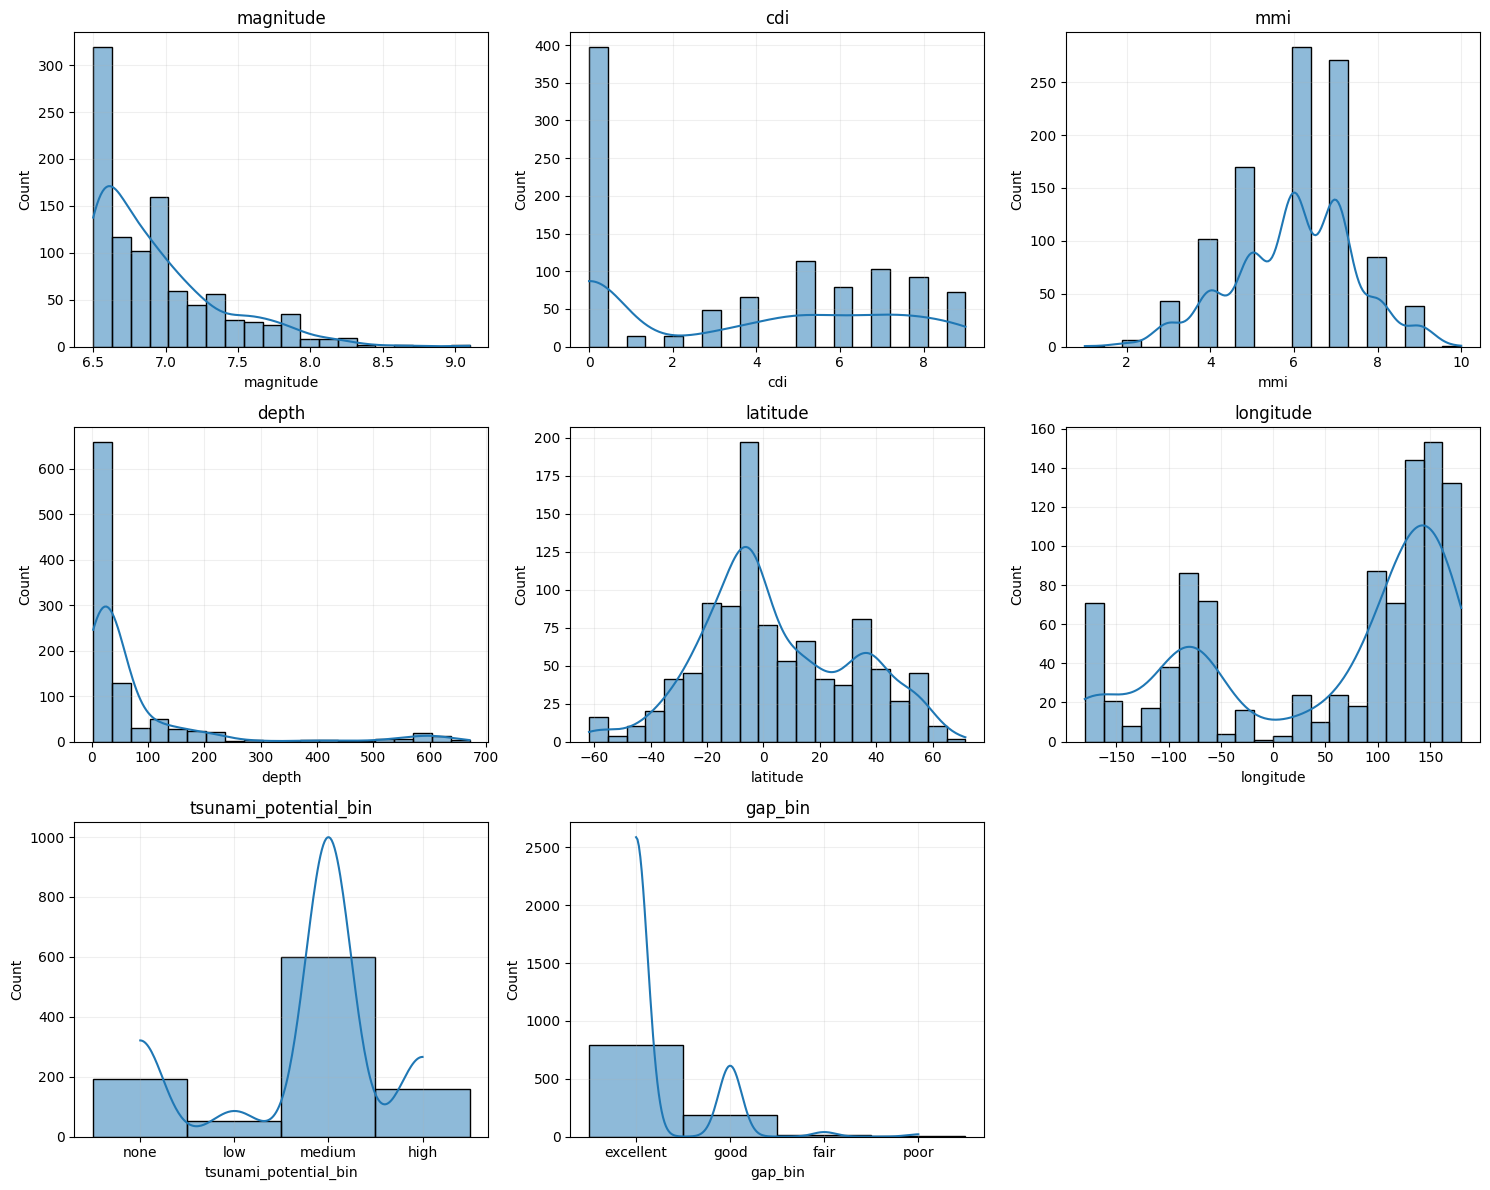

In [1564]:
num_cols = X.columns
n = len(num_cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(X[col], bins=20, kde=True)
    plt.title(col)
    plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

In [1565]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# Create preprocessing pipeline
# Define ordinal features with their categories in order
ordinal_ftrs = ['tsunami_potential_bin', 'gap_bin']

# Order logic for OrdinalEncoder: First category -> 0, Last category -> n-1
# Tsunami Potential: none (0) < low (1) < medium (2) < high (3)
# Gap Quality: poor (0) < fair (1) < good (2) < excellent (3)
# This fulfills "smaller gap -> larger weight"
ordinal_cats = [
    ['none', 'low', 'medium', 'high'],          # tsunami_potential_bin
    ['poor', 'fair', 'good', 'excellent']       # gap_bin
]

minmax_ftrs = ['longitude', 'latitude', 'mmi', 'cdi']
std_ftrs = ['depth', 'magnitude']

# Ordinal encoder
# This ensures the ordinal relationship is preserved
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='none')), # Note: fill_value might need adjustment for gap_bin if NaNs exist
    ('ordinal', OrdinalEncoder(categories=ordinal_cats, handle_unknown='use_encoded_value', unknown_value=-1))
])

# Standard scaler
std_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('stdscaler', StandardScaler())])

minmax_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('minmax_scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_ftrs),
        ('minmax', minmax_transformer, minmax_ftrs),
        ('std', std_transformer, std_ftrs)
    ],
    remainder='drop'
)

## Baseline Model Evaluation

Before evaluating complex models, we establish baseline performance using a dummy classifier that predicts the majority class (no tsunami) for all samples.

In [1566]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
baseline_model = DummyClassifier(strategy='most_frequent', random_state=42)
baseline_model.fit(X_other, y_other)

baseline_val_pred = baseline_model.predict(X_test)

baseline_accuracy = accuracy_score(y_test, baseline_val_pred)
baseline_precision = precision_score(y_test, baseline_val_pred, zero_division=0)
baseline_recall = recall_score(y_test, baseline_val_pred, zero_division=0)
baseline_f1 = f1_score(y_test, baseline_val_pred, zero_division=0)

baseline_metrics = {
    'Accuracy': baseline_accuracy,
    'Precision': baseline_precision,
    'Recall': baseline_recall,
    'F1-Score': baseline_f1
}

baseline_metrics

{'Accuracy': 0.67, 'Precision': 0.0, 'Recall': 0.0, 'F1-Score': 0.0}

## Train and Evaluate XGBoost

In [1567]:
import numpy as np
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import f1_score


def find_best_params(X_other, y_other, random_state, preprocessor):
    # Setup Stratified K-Fold for the inner cross-validation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    
    best_overall_score = 0
    best_overall_params = None

    # Convert parameter grid to a list of dictionaries
    ratio = y_other.value_counts()[0] / y_other.value_counts()[1]
    param_grid = {
        'n_estimators': [5000],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.1],
        'reg_lambda': [1, 10, 50],
        'reg_alpha': [1, 10],
        'gamma': [1, 5],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'min_child_weight': [5, 10, 20],
        'scale_pos_weight': [ratio, ratio * 0.8, ratio * 1.2]
    }
    params_list = list(ParameterGrid(param_grid))
    print(f"Grid Search combinations: {len(params_list)}")

    # Iterate through each parameter combination
    for params in params_list:
        fold_scores = []
        
        # Perform K-Fold Cross-Validation
        for train_idx, val_idx in kf.split(X_other, y_other):
            # Split data into training and validation folds
            X_train_fold, X_val_fold = X_other.iloc[train_idx].copy(), X_other.iloc[val_idx].copy()
            y_train_fold, y_val_fold = y_other.iloc[train_idx], y_other.iloc[val_idx]

            # Preprocess
            X_train_prep = preprocessor.fit_transform(X_train_fold)
            X_val_prep = preprocessor.transform(X_val_fold)
        
            # Initialize the XGBoost Classifier with early_stopping_rounds
            model = XGBClassifier(
                **params,
                random_state=random_state,
                n_jobs=-1,
                early_stopping_rounds=50
            )

            # Fit the model with Early Stopping
            model.fit(
                X_train_prep, y_train_fold,
                eval_set=[(X_val_prep, y_val_fold)],
                verbose=False
            )

            # Evaluate the fold using the best iteration found
            y_val_pred = model.predict(X_val_prep)
            fold_score = f1_score(y_val_fold, y_val_pred, zero_division=0)
            fold_scores.append(fold_score)
        
        # Calculate mean score across all folds for this parameter combination
        mean_fold_score = np.mean(fold_scores)
        
        # Track the best parameters based on Cross-Validation score
        if mean_fold_score > best_overall_score:
            best_overall_score = mean_fold_score
            best_overall_params = params
    
    print(f"Random State: {random_state}")
    print(f"Best Score: {best_overall_score}")
    print(f"Best Parameters: {best_overall_params}")
    return best_overall_params


## Final Model Training and Evaluation

Train the best XGBoost model using optimal hyperparameters from grid search and evaluate on validation and test sets.

In [1568]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


def train_xgb_model(X, y, tag, random_state):
    # Split other and test data
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)
    best_params = find_best_params(X_other, y_other, random_state, preprocessor)
    X_other_processed = preprocessor.fit_transform(X_other)
    X_test_processed = preprocessor.transform(X_test)
    
    # Initialize model with best params and early_stopping_rounds
    model = XGBClassifier(
        **best_params, 
        random_state=random_state, 
        eval_metric='logloss',
        early_stopping_rounds=50
    )

    # We use a 10% split of X_other for the final early stopping target
    X_f_train, X_f_val, y_f_train, y_f_val = train_test_split(
        X_other_processed, y_other, test_size=0.1, stratify=y_other, random_state=random_state
    )
    model.fit(
        X_f_train, y_f_train,
        eval_set=[(X_f_val, y_f_val)],
        verbose=False
    )
    y_test_pred = model.predict(X_test_processed)
    y_test_pred_prob = model.predict_proba(X_test_processed)[:, 1]

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)

    test_metrics = {
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1-Score': test_f1,
    }

    
    y_test_pred_series = pd.DataFrame({
        f"pred_{random_state}": y_test_pred
    }).reset_index(drop=True)
    y_test_pred_prob_series = pd.DataFrame({
        f"prob_{random_state}": y_test_pred_prob
    }).reset_index(drop=True)

    return pd.DataFrame({
        tag: test_metrics
    }), y_test_pred_series, y_test_pred_prob_series, y_test, model


final_df = pd.DataFrame()
final_y_test_pred = pd.DataFrame()
final_y_test_pred_prob = pd.DataFrame()
final_y_test = pd.DataFrame()
best_xgb_models = {}
for random_state in [0, 1, 7, 13, 21, 42, 66, 88, 123, 2025]:
    df, y_test_pred, y_test_pred_prob, y_test, model = train_xgb_model(X, y, tag='XGBoost', random_state=random_state)

    final_df = pd.concat([final_df, df], axis=1, ignore_index=True)
    final_y_test_pred = pd.concat([final_y_test_pred, y_test_pred], axis=1, ignore_index=True)
    final_y_test_pred_prob = pd.concat([final_y_test_pred_prob, y_test_pred_prob], axis=1, ignore_index=True)
    final_y_test = pd.concat([final_y_test, y_test.reset_index(drop=True)], axis=1, ignore_index=True)
    best_xgb_models[random_state] = model


Grid Search combinations: 324
Random State: 0
Best Score: 0.7045105036883288
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 20, 'n_estimators': 5000, 'reg_alpha': 1, 'reg_lambda': 10, 'scale_pos_weight': np.float64(2.4923076923076923), 'subsample': 0.8}
Grid Search combinations: 324
Random State: 1
Best Score: 0.6893871978479238
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 5000, 'reg_alpha': 1, 'reg_lambda': 10, 'scale_pos_weight': np.float64(2.4923076923076923), 'subsample': 0.8}
Grid Search combinations: 324
Random State: 7
Best Score: 0.7009063167825051
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 5000, 'reg_alpha': 1, 'reg_lambda': 1, 'scale_pos_weight': np.float64(2.4923076923076923), 'subsample': 0.8}
Grid Search combinations: 324
Random State:

In [1569]:
final_df

,0,1,2,3,4,5,6,7,8,9
Accuracy,0.715000,0.815000,0.790000,0.755000,0.740000,0.760000,0.775000,0.770000,0.785000,0.745000
Precision,0.535714,0.666667,0.638554,0.588889,0.564356,0.600000,0.628205,0.617284,0.625000,0.576087
Recall,0.923077,0.861538,0.815385,0.815385,0.876923,0.784615,0.753846,0.769231,0.846154,0.815385
F1-Score,0.677966,0.751678,0.716216,0.683871,0.686747,0.680000,0.685315,0.684932,0.718954,0.675159


In [1570]:
df.to_csv('../data/processed_results/XGBoost precision.csv', index=False)
final_y_test_pred.to_csv('../data/processed_results/XGBoost y_test_pred.csv', index=False)
final_y_test_pred_prob.to_csv('../data/processed_results/XGBoost y_test_pred_prob.csv', index=False)
final_y_test.to_csv('../data/processed_results/XGBoost y_test.csv', index=False)

## Model Interpretation: Confusion Matrix

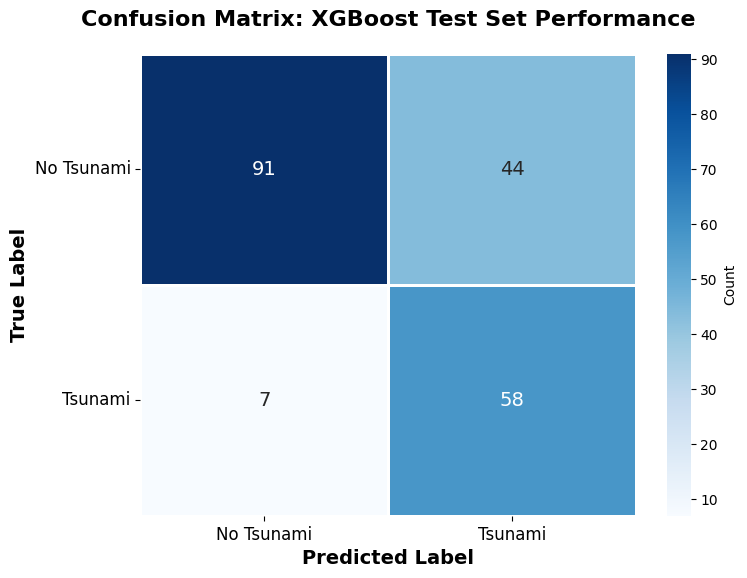

True Negatives: 91
False Positives: 44
False Negatives: 7
True Positives: 58
Specificity (True Negative Rate): 0.674074074074074
Sensitivity (Recall): 0.8923076923076924


In [1584]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(y_pred, y_test, classes, tag,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar_kws={'label': 'Count'}, ax=ax,
                linewidths=2, linecolor='white', annot_kws={'size': 14})
    ax.set_xlabel('Predicted Label', fontsize=14, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=14, fontweight='bold')
    ax.set_title(f'Confusion Matrix: {tag} Test Set Performance', fontsize=16, fontweight='bold', pad=20)
    ax.set_xticklabels(classes, fontsize=12)
    ax.set_yticklabels(classes, fontsize=12, rotation=0)

    plt.savefig(f'../figures/{tag}_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    print(f"Specificity (True Negative Rate): {specificity}")
    print(f"Sensitivity (Recall): {sensitivity}")

plot_confusion_matrix(final_y_test_pred.iloc[:, 1], final_y_test.iloc[:, 1], classes=['No Tsunami', 'Tsunami'], tag='XGBoost')

## ROC Curve Analysis

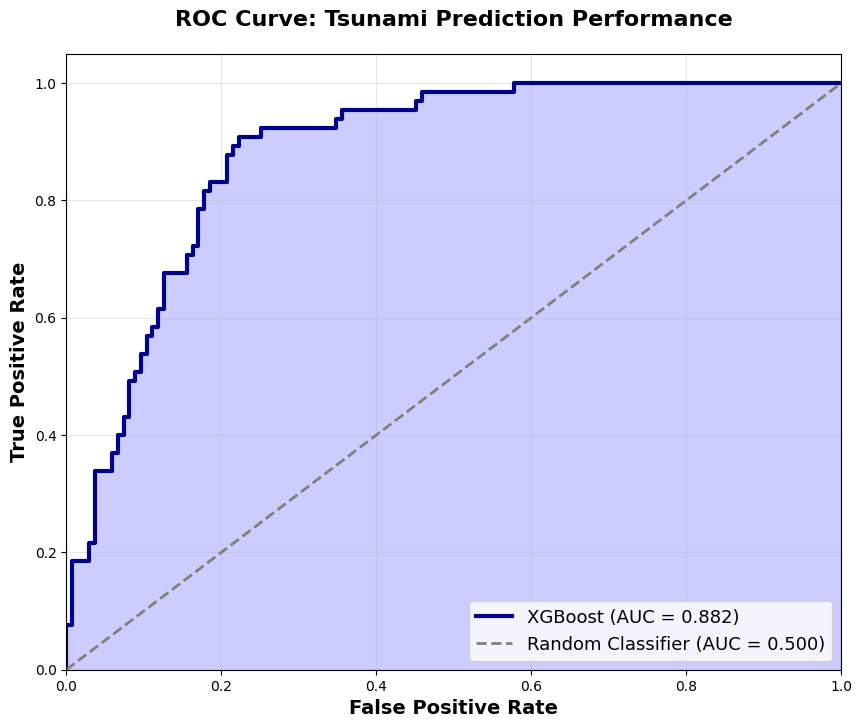

In [1585]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV files
final_y_test = pd.read_csv('../data/processed_results/XGBoost y_test.csv')
final_y_test_pred = pd.read_csv('../data/processed_results/XGBoost y_test_pred.csv')
final_y_test_pred_prob = pd.read_csv('../data/processed_results/XGBoost y_test_pred_prob.csv')

def plot_roc_curve(y_test, y_test_proba, tag):
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(fpr, tpr, color='darkblue', lw=3, label=f'{tag} (AUC = {roc_auc:.3f})')
    ax.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Classifier (AUC = 0.500)')
    ax.fill_between(fpr, tpr, alpha=0.2, color='blue')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=14, fontweight='bold')
    ax.set_ylabel('True Positive Rate', fontsize=14, fontweight='bold')
    ax.set_title('ROC Curve: Tsunami Prediction Performance', fontsize=16, fontweight='bold', pad=20)
    ax.legend(loc='lower right', fontsize=13)
    ax.grid(True, alpha=0.3)

    plt.savefig(f'../figures/{tag}_roc_curve.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_roc_curve(final_y_test.iloc[:, 1], final_y_test_pred_prob.iloc[:, 1], 'XGBoost')


## Feature Importance Analysis

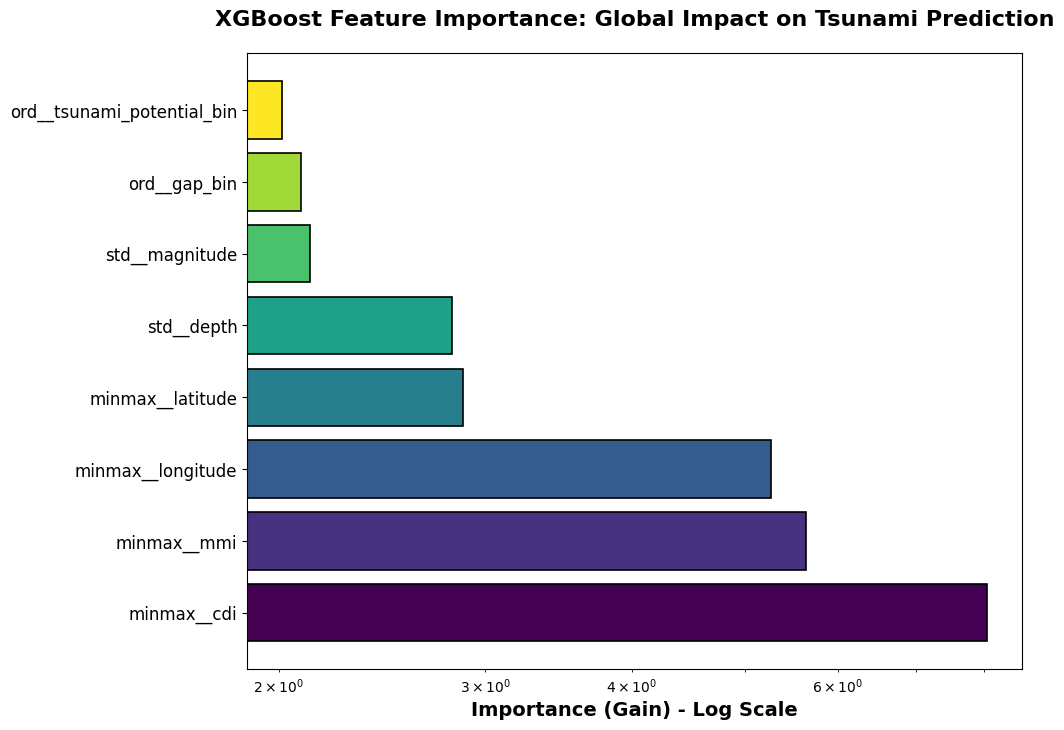

minmax__cdi: 8.039155006408691
minmax__mmi: 5.638175010681152
minmax__longitude: 5.263383865356445
minmax__latitude: 2.8722357749938965
std__depth: 2.8131515979766846


In [1618]:
# Select model and reconstruct data split
random_seed = 1
final_model = best_xgb_models[random_seed]

# Reconstruct the same split to get the fitted preprocessor
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_seed)
X_other_processed = preprocessor.fit_transform(X_other)

# Get actual feature names from preprocessor
actual_feature_names = preprocessor.get_feature_names_out()

# Create mapping from f0, f1, f2... to actual feature names
feature_name_mapping = {f'f{i}': name for i, name in enumerate(actual_feature_names)}

# Get feature importance from the model
feature_importance = final_model.get_booster().get_score(importance_type='gain')
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
features = [feature_name_mapping.get(item[0], item[0]) for item in sorted_features]
importances = [item[1] for item in sorted_features]

fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(features)))
bars = ax.barh(range(len(features)), importances, color=colors, edgecolor='black', linewidth=1.2)

ax.set_yticks(range(len(features)))
ax.set_yticklabels(features, fontsize=12)

ax.set_xscale('log')
ax.set_xlabel('Importance (Gain) - Log Scale', fontsize=14, fontweight='bold')
ax.set_title('XGBoost Feature Importance: Global Impact on Tsunami Prediction',
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')

plt.savefig('../figures/xgb_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

for name, imp in zip(features[:5], importances[:5]):
    print(f"{name}: {imp}")

## SHAP Values for Local Interpretability

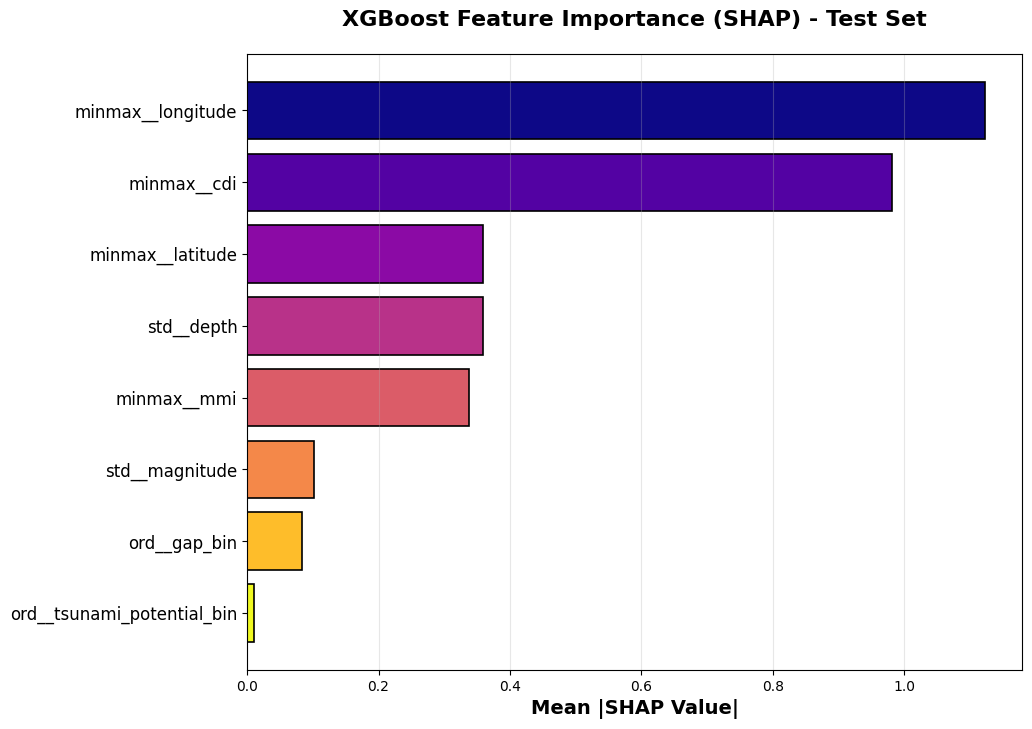

,Feature,SHAP Importance
2,minmax__longitude,1.122950
5,minmax__cdi,0.980689
3,minmax__latitude,0.359081
6,std__depth,0.359067
4,minmax__mmi,0.337506
7,std__magnitude,0.102124
1,ord__gap_bin,0.083789
0,ord__tsunami_potential_bin,0.010282


In [1587]:
import xgboost


random_seed = 1
final_model = best_xgb_models[random_seed]

# Reconstruct the SAME data split to get X_test for SHAP analysis
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_seed)

# Fit preprocessor on training data and transform test data
X_other_processed = preprocessor.fit_transform(X_other)
X_test_processed = preprocessor.transform(X_test)

# Get feature names and create DataFrame for SHAP
feature_names = preprocessor.get_feature_names_out()
X_prep_df = pd.DataFrame(X_test_processed, columns=feature_names)

# Compute SHAP values on the Test Set
shap_values = final_model.get_booster().predict(xgboost.DMatrix(X_prep_df), pred_contribs=True)
shap_vals_only = shap_values[:, :-1]
base_value = shap_values[0, -1]

shap_mean_abs = np.abs(shap_vals_only).mean(axis=0)
shap_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Importance': shap_mean_abs
}).sort_values('SHAP Importance', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
top_n = min(10, len(shap_feature_importance))
top_features = shap_feature_importance.head(top_n)
colors = plt.cm.plasma(np.linspace(0, 1, top_n))
bars = ax.barh(range(top_n), top_features['SHAP Importance'].values, color=colors,
               edgecolor='black', linewidth=1.2)

ax.set_yticks(range(top_n))
ax.set_yticklabels(top_features['Feature'].values, fontsize=12)
ax.set_xlabel('Mean |SHAP Value|', fontsize=14, fontweight='bold')
ax.set_title('XGBoost Feature Importance (SHAP) - Test Set', fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()

plt.savefig('../figures/XGBoost_shap_importance.png', dpi=300, bbox_inches='tight')
plt.show()

shap_feature_importance.head(10)

## Train and Evaluate Logistic Regression


In [1588]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Parameter grid for Logistic Regression - tuning C and solver
logreg_param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'logisticregression__solver': ['liblinear', 'saga']
}

final_df = pd.DataFrame()
final_y_test_pred = pd.DataFrame()
final_y_test_pred_prob = pd.DataFrame()
final_y_test = pd.DataFrame()
best_logreg_models = {}  # Store trained models

for random_state in [0, 1, 7, 13, 21, 42, 66, 88, 123, 2025]:
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    clf = LogisticRegression(random_state=random_state, max_iter=2000)

    # Create the pipeline
    pipe = make_pipeline(preprocessor, clf)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipe, param_grid=logreg_param_grid, scoring='f1', cv=kf, 
                               return_train_score=True, n_jobs=-1, verbose=0)
    grid_search.fit(X_other, y_other)

    # Print results
    print(f'Random State: {random_state}')
    print(f'Best parameters: {grid_search.best_params_}')
    print(f'CV F1 Score: {grid_search.best_score_}')

    # Compute test predictions and metrics
    y_test_pred = grid_search.predict(X_test)
    y_test_pred_prob = grid_search.predict_proba(X_test)[:, 1]
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
    
    print(f'Test Precision: {test_precision}')
    print(f'Test Recall: {test_recall}')
    print(f'Test F1-Score: {test_f1}')

    test_metrics = {
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1-Score': test_f1,
    }

    y_test_pred_series = pd.DataFrame({
        f"pred_{random_state}": y_test_pred
    }).reset_index(drop=True)
    y_test_pred_prob_series = pd.DataFrame({
        f"prob_{random_state}": y_test_pred_prob
    }).reset_index(drop=True)

    df = pd.DataFrame({
        'Logreg': test_metrics
    })
    
    final_df = pd.concat([final_df, df], axis=1, ignore_index=True)
    final_y_test_pred = pd.concat([final_y_test_pred, y_test_pred_series], axis=1, ignore_index=True)
    final_y_test_pred_prob = pd.concat([final_y_test_pred_prob, y_test_pred_prob_series], axis=1, ignore_index=True)
    final_y_test = pd.concat([final_y_test, y_test.reset_index(drop=True)], axis=1, ignore_index=True)
    best_logreg_models[random_state] = grid_search.best_estimator_  # Save the best pipeline

print(final_df)

Random State: 0
Best parameters: {'logisticregression__C': 1000, 'logisticregression__solver': 'liblinear'}
CV F1 Score: 0.4578388891168649
Test Precision: 0.5283018867924528
Test Recall: 0.4307692307692308
Test F1-Score: 0.4745762711864407
Random State: 1
Best parameters: {'logisticregression__C': 10, 'logisticregression__solver': 'liblinear'}
CV F1 Score: 0.40774610028052616
Test Precision: 0.7058823529411765
Test Recall: 0.36923076923076925
Test F1-Score: 0.48484848484848486
Random State: 7
Best parameters: {'logisticregression__C': 1000, 'logisticregression__solver': 'liblinear'}
CV F1 Score: 0.48093005691663093
Test Precision: 0.5
Test Recall: 0.36923076923076925
Test F1-Score: 0.4247787610619469
Random State: 13
Best parameters: {'logisticregression__C': 100, 'logisticregression__solver': 'liblinear'}
CV F1 Score: 0.4620248214485714
Test Precision: 0.5625
Test Recall: 0.27692307692307694
Test F1-Score: 0.3711340206185567
Random State: 21
Best parameters: {'logisticregression__C':

In [1589]:
df.to_csv('../data/processed_results/Logreg precision.csv', index=False)
final_y_test_pred.to_csv('../data/processed_results/Logreg y_test_pred.csv', index=False)
final_y_test_pred_prob.to_csv('../data/processed_results/Logreg y_test_pred_prob.csv', index=False)
final_y_test.to_csv('../data/processed_results/Logreg y_test.csv', index=False)

## Logistic Regression Feature Importance Analysis

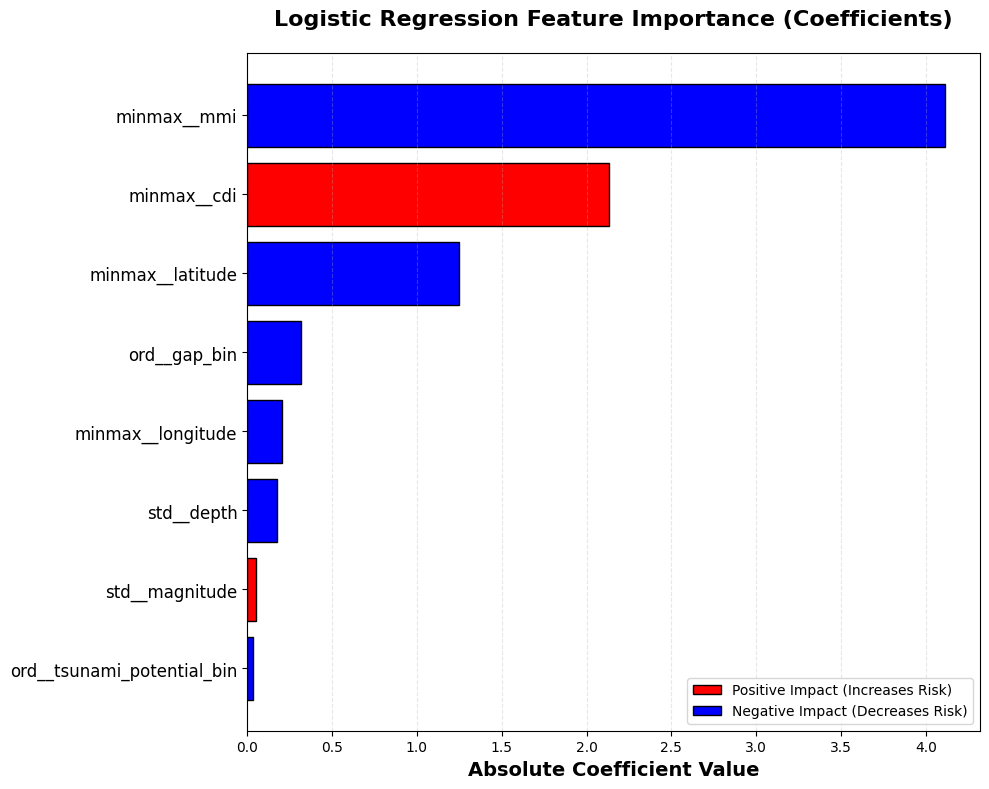

Top 10 Important Features for Logistic Regression:


,Feature,Coefficient,Abs_Coefficient
4,minmax__mmi,-4.112485,4.112485
5,minmax__cdi,2.130928,2.130928
3,minmax__latitude,-1.245871,1.245871
1,ord__gap_bin,-0.317004,0.317004
2,minmax__longitude,-0.207763,0.207763
6,std__depth,-0.175139,0.175139
7,std__magnitude,0.051910,0.051910
0,ord__tsunami_potential_bin,-0.033741,0.033741


In [ ]:
from matplotlib.patches import Patch

# Select one of the trained models (random_state=1)
random_seed = 1
best_logreg_pipe = best_logreg_models[random_seed]

# Extract the fitted LogisticRegression model from the pipeline
logreg_model = best_logreg_pipe.named_steps['logisticregression']
fitted_preprocessor = best_logreg_pipe.named_steps['columntransformer']

# Get feature names from the fitted preprocessor
feature_names = fitted_preprocessor.get_feature_names_out()

# Get coefficients from the trained model
coefficients = logreg_model.coef_[0]

logreg_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))

# Use the minimum of 15 or actual number of features
top_n = min(15, len(logreg_feature_importance))
top_features = logreg_feature_importance.head(top_n)

# Create colors based on sign of coefficient (Red for positive/Tsunami, Blue for negative/No Tsunami)
colors = ['red' if c > 0 else 'blue' for c in top_features['Coefficient']]

ax.barh(range(top_n), top_features['Abs_Coefficient'], color=colors, edgecolor='black', align='center')
ax.set_yticks(range(top_n))
ax.set_yticklabels(top_features['Feature'], fontsize=12)
ax.invert_yaxis()
ax.set_xlabel('Absolute Coefficient Value', fontsize=14, fontweight='bold')
ax.set_title('Logistic Regression Feature Importance (Coefficients)', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', linestyle='--', alpha=0.3)

legend_elements = [Patch(facecolor='red', edgecolor='black', label='Positive Impact (Increases Risk)'),
                   Patch(facecolor='blue', edgecolor='black', label='Negative Impact (Decreases Risk)')]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('../figures/logreg_feature_importance.png', dpi=300)
plt.show()

print("Top 10 Important Features for Logistic Regression:")
display(logreg_feature_importance.head(10))

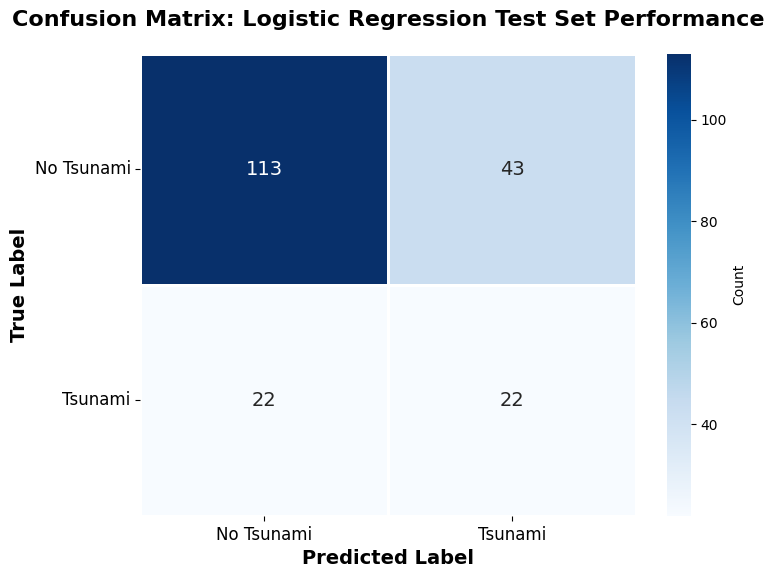

True Negatives: 113
False Positives: 43
False Negatives: 22
True Positives: 22
Specificity (True Negative Rate): 0.7243589743589743
Sensitivity (Recall): 0.5


In [1591]:
plot_confusion_matrix(final_y_test.iloc[:, 4], final_y_test_pred.iloc[:, 4], classes=['No Tsunami', 'Tsunami'], tag='Logistic Regression')

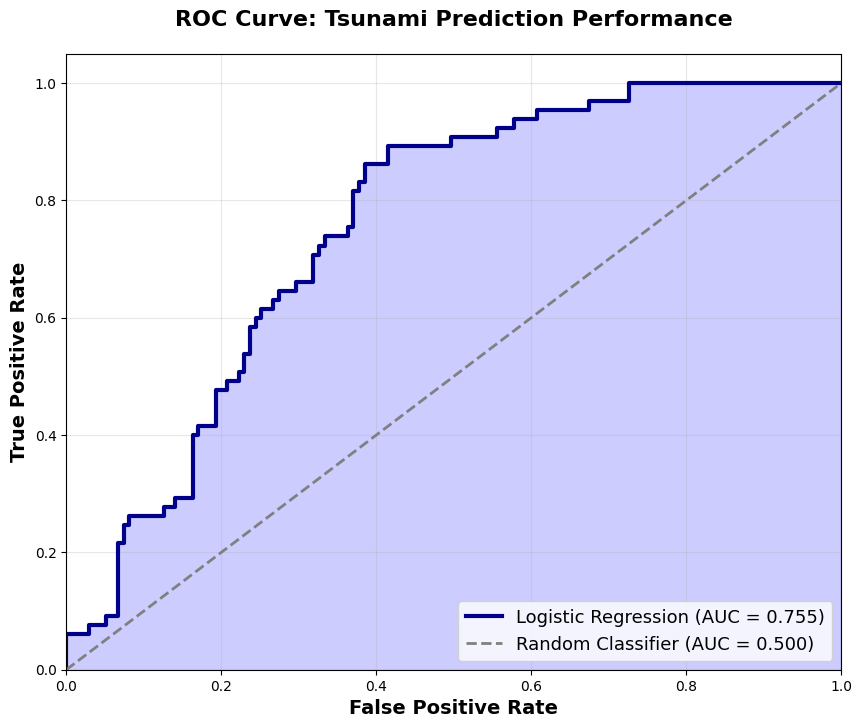

In [1592]:
plot_roc_curve(final_y_test.iloc[:, 4], final_y_test_pred_prob.iloc[:, 4], 'Logistic Regression')

## Train and Evaluate Support Vector Machine Classifier

In [1593]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Parameter grid for SVM - tuning C, gamma, and kernel type
svc_param_grid = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10],
    'svc__kernel': ['rbf', 'linear']
}

final_df = pd.DataFrame()
final_y_test_pred = pd.DataFrame()
final_y_test_pred_prob = pd.DataFrame()
final_y_test = pd.DataFrame()
best_svc_models = {}  # Store trained models

for random_state in [0, 1, 7, 13, 21, 42, 66, 88, 123, 2025]:
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    # Initialize SVM Classifier with class balancing
    clf = SVC(random_state=random_state, probability=True, class_weight='balanced')

    # Create the pipeline
    pipe = make_pipeline(preprocessor, clf)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipe, param_grid=svc_param_grid, scoring='f1', cv=kf, 
                               return_train_score=True, n_jobs=-1, verbose=0)
    grid_search.fit(X_other, y_other)

    # Print results
    print(f'Random State: {random_state}')
    print(f'Best parameters: {grid_search.best_params_}')
    print(f'CV F1 Score: {grid_search.best_score_}')

    # Compute test predictions and metrics
    y_test_pred = grid_search.predict(X_test)
    y_test_pred_prob = grid_search.predict_proba(X_test)[:, 1]
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
    
    print(f'Test Precision: {test_precision}')
    print(f'Test Recall: {test_recall}')
    print(f'Test F1-Score: {test_f1}')

    test_metrics = {
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1-Score': test_f1,
    }

    y_test_pred_series = pd.DataFrame({
        f"pred_{random_state}": y_test_pred
    }).reset_index(drop=True)
    y_test_pred_prob_series = pd.DataFrame({
        f"prob_{random_state}": y_test_pred_prob
    }).reset_index(drop=True)

    df = pd.DataFrame({
        'SVC': test_metrics
    })
    
    final_df = pd.concat([final_df, df], axis=1, ignore_index=True)
    final_y_test_pred = pd.concat([final_y_test_pred, y_test_pred_series], axis=1, ignore_index=True)
    final_y_test_pred_prob = pd.concat([final_y_test_pred_prob, y_test_pred_prob_series], axis=1, ignore_index=True)
    final_y_test = pd.concat([final_y_test, y_test.reset_index(drop=True)], axis=1, ignore_index=True)
    best_svc_models[random_state] = grid_search.best_estimator_  # Save the best pipeline

print(final_df)

Random State: 0
Best parameters: {'svc__C': 100, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
CV F1 Score: 0.6198043934644248
Test Precision: 0.5053763440860215
Test Recall: 0.7230769230769231
Test F1-Score: 0.5949367088607594
Random State: 1
Best parameters: {'svc__C': 100, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
CV F1 Score: 0.5985286958603988
Test Precision: 0.5686274509803921
Test Recall: 0.8923076923076924
Test F1-Score: 0.6946107784431138
Random State: 7
Best parameters: {'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
CV F1 Score: 0.6137365616419344
Test Precision: 0.4205607476635514
Test Recall: 0.6923076923076923
Test F1-Score: 0.5232558139534884
Random State: 13
Best parameters: {'svc__C': 100, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}
CV F1 Score: 0.5924658373356755
Test Precision: 0.5157894736842106
Test Recall: 0.7538461538461538
Test F1-Score: 0.6125
Random State: 21
Best parameters: {'svc__C': 100, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
CV F1 Score: 0.6210922

In [1594]:
df.to_csv('../data/processed_results/SVC precision.csv', index=False)
final_y_test_pred.to_csv('../data/processed_results/SVC y_test_pred.csv', index=False)
final_y_test_pred_prob.to_csv('../data/processed_results/SVC y_test_pred_prob.csv', index=False)
final_y_test.to_csv('../data/processed_results/SVC y_test.csv', index=False)

Calculating permutation importance... (this may take a moment)


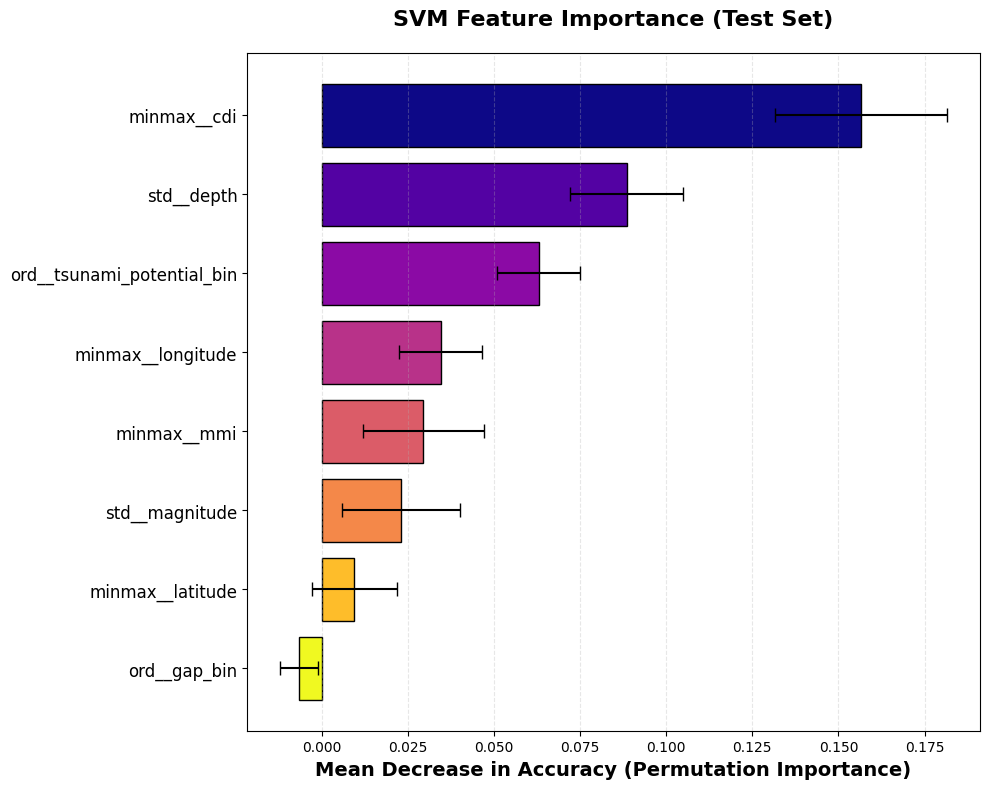

Top 10 Important Features for SVM (Permutation Importance):


,Feature,Importance_Mean,Importance_Std
5,minmax__cdi,0.1565,0.024905
6,std__depth,0.0885,0.016439
0,ord__tsunami_potential_bin,0.0630,0.012083
2,minmax__longitude,0.0345,0.012135
4,minmax__mmi,0.0295,0.017671
7,std__magnitude,0.0230,0.017205
3,minmax__latitude,0.0095,0.012339
1,ord__gap_bin,-0.0065,0.005500


In [ ]:
# Support Vector Machine Feature Importance (Permutation Importance)
from sklearn.inspection import permutation_importance

# Select one of the trained models (random_state=1)
random_seed = 1
best_svc_pipe = best_svc_models[random_seed]

# Extract the fitted SVC model and preprocessor from the pipeline
svc_model = best_svc_pipe.named_steps['svc']
fitted_preprocessor = best_svc_pipe.named_steps['columntransformer']
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_seed)

# Get preprocessed data using the fitted preprocessor from the pipeline
X_test_processed = fitted_preprocessor.transform(X_test)
feature_names = fitted_preprocessor.get_feature_names_out()

# Calculate Permutation Importance on TEST set (using already trained model)
print("Calculating permutation importance... (this may take a moment)")
perm_importance = permutation_importance(svc_model, X_test_processed, y_test,
                                         n_repeats=10, random_state=42, n_jobs=-1)

svc_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance_Mean': perm_importance.importances_mean,
    'Importance_Std': perm_importance.importances_std
}).sort_values('Importance_Mean', ascending=False)


fig, ax = plt.subplots(figsize=(10, 8))
top_n = min(15, len(svc_feature_importance))
top_features = svc_feature_importance.head(top_n)

# Create gradient colors
colors = plt.cm.plasma(np.linspace(0, 1, top_n))
ax.barh(range(top_n), top_features['Importance_Mean'], xerr=top_features['Importance_Std'],
        color=colors, edgecolor='black', align='center', capsize=5)
ax.set_yticks(range(top_n))
ax.set_yticklabels(top_features['Feature'], fontsize=12)
ax.invert_yaxis()  # Highest importance at top

ax.set_xlabel('Mean Decrease in Accuracy (Permutation Importance)', fontsize=14, fontweight='bold')
ax.set_title('SVM Feature Importance (Test Set)', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/svc_feature_importance.png', dpi=300)
plt.show()

# Display top features
print("Top 10 Important Features for SVM (Permutation Importance):")
display(svc_feature_importance.head(10))

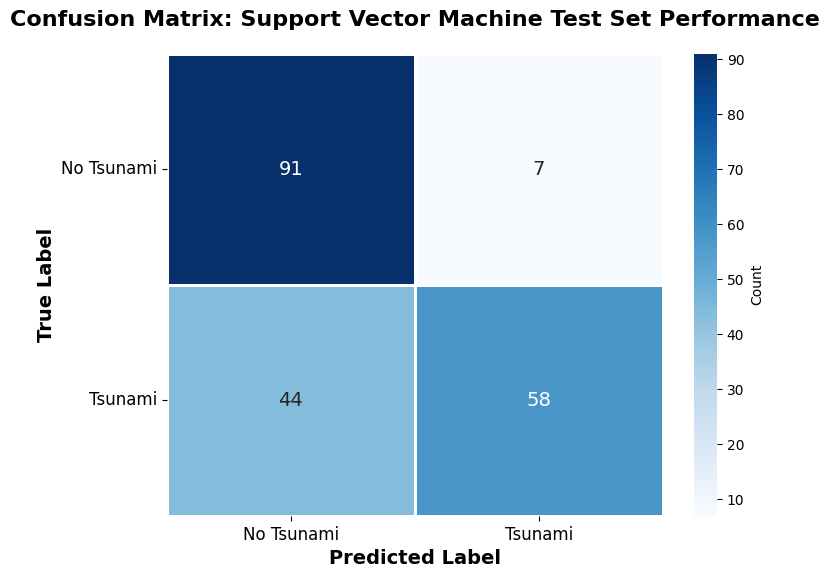

True Negatives: 91
False Positives: 7
False Negatives: 44
True Positives: 58
Specificity (True Negative Rate): 0.9285714285714286
Sensitivity (Recall): 0.5686274509803921


In [1596]:
plot_confusion_matrix(final_y_test.iloc[:, 1], final_y_test_pred.iloc[:, 1], classes=['No Tsunami', 'Tsunami'], tag='Support Vector Machine')

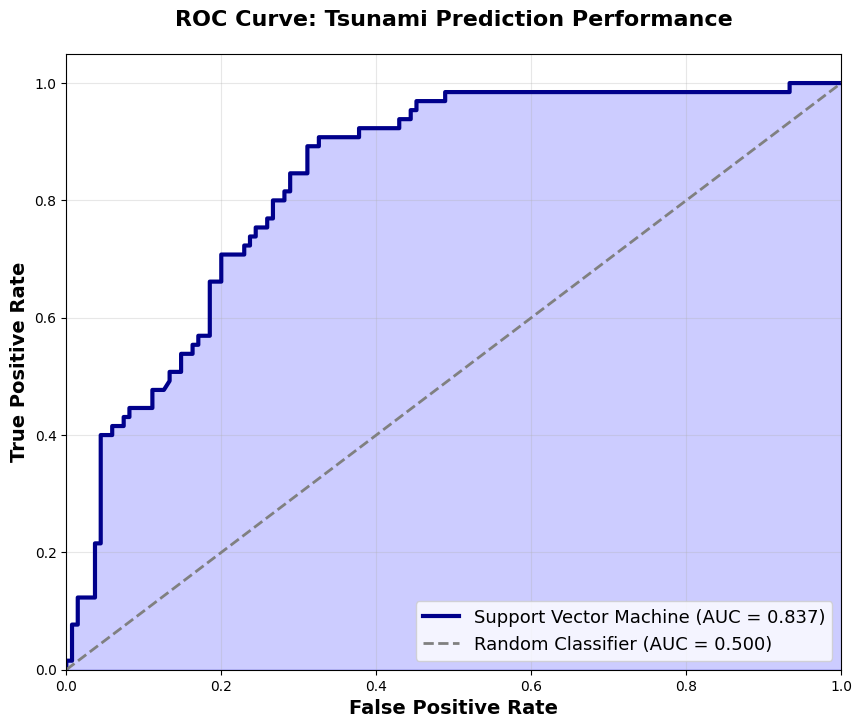

In [1597]:
plot_roc_curve(final_y_test.iloc[:, 1], final_y_test_pred_prob.iloc[:, 1], 'Support Vector Machine')

## Train and Evaluate Random Forest Classifier

In [1598]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Parameter grid for RandomForestClassifier - comprehensive hyperparameter tuning
rf_param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [3, 5, 10, 20, 50],
    'randomforestclassifier__max_features': [0.3, 0.5, 0.7, 'sqrt'],
}

final_df = pd.DataFrame()
final_y_test_pred = pd.DataFrame()
final_y_test_pred_prob = pd.DataFrame()
final_y_test = pd.DataFrame()
best_rf_models = {}  # Store trained models

for random_state in [0, 1, 7, 13, 21, 42, 66, 88, 123, 2025]:
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    clf = RandomForestClassifier(random_state=random_state, n_jobs=-1)

    # Create the pipeline
    pipe = make_pipeline(preprocessor, clf)

    grid_search = GridSearchCV(pipe, param_grid=rf_param_grid, scoring='f1', cv=kf, 
                               return_train_score=True, verbose=0)
    grid_search.fit(X_other, y_other)

    # Print results
    print(f'Random State: {random_state}')
    print(f'Best parameters: {grid_search.best_params_}')
    print(f'CV F1 Score: {grid_search.best_score_}')

    # Compute test predictions and metrics
    y_test_pred = grid_search.predict(X_test)
    y_test_pred_prob = grid_search.predict_proba(X_test)[:, 1]
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
    
    print(f'Test Precision: {test_precision}')
    print(f'Test Recall: {test_recall}')
    print(f'Test F1-Score: {test_f1}')

    test_metrics = {
        'Accuracy': test_accuracy,
        'Precision': test_precision,
        'Recall': test_recall,
        'F1-Score': test_f1,
    }

    y_test_pred_series = pd.DataFrame({
        f"pred_{random_state}": y_test_pred
    }).reset_index(drop=True)
    y_test_pred_prob_series = pd.DataFrame({
        f"prob_{random_state}": y_test_pred_prob
    }).reset_index(drop=True)

    df = pd.DataFrame({
        'RF': test_metrics
    })
    
    final_df = pd.concat([final_df, df], axis=1, ignore_index=True)
    final_y_test_pred = pd.concat([final_y_test_pred, y_test_pred_series], axis=1, ignore_index=True)
    final_y_test_pred_prob = pd.concat([final_y_test_pred_prob, y_test_pred_prob_series], axis=1, ignore_index=True)
    final_y_test = pd.concat([final_y_test, y_test.reset_index(drop=True)], axis=1, ignore_index=True)
    best_rf_models[random_state] = grid_search.best_estimator_  # Save the best pipeline

print(final_df)

Random State: 0
Best parameters: {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 0.7, 'randomforestclassifier__n_estimators': 300}
CV F1 Score: 0.6554271111737773
Test Precision: 0.647887323943662
Test Recall: 0.7076923076923077
Test F1-Score: 0.6764705882352942
Random State: 1
Best parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5, 'randomforestclassifier__n_estimators': 300}
CV F1 Score: 0.6267421383647799
Test Precision: 0.660377358490566
Test Recall: 0.5384615384615384
Test F1-Score: 0.5932203389830508
Random State: 7
Best parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.7, 'randomforestclassifier__n_estimators': 200}
CV F1 Score: 0.5984899810805778
Test Precision: 0.7288135593220338
Test Recall: 0.6615384615384615
Test F1-Score: 0.6935483870967742
Random State: 13
Best parameters: {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_fea

In [1614]:
final_df

,0,1,2,3,4,5,6,7,8,9
Accuracy,0.780000,0.760000,0.810000,0.800000,0.720000,0.805000,0.745000,0.770000,0.780000,0.755000
Precision,0.647887,0.660377,0.728814,0.692308,0.569231,0.724138,0.616667,0.672727,0.656716,0.621212
Recall,0.707692,0.538462,0.661538,0.692308,0.569231,0.646154,0.569231,0.569231,0.676923,0.630769
F1-Score,0.676471,0.593220,0.693548,0.692308,0.569231,0.682927,0.592000,0.616667,0.666667,0.625954


In [1599]:
df.to_csv('../data/processed_results/RF precision.csv', index=False)
final_y_test_pred.to_csv('../data/processed_results/RF y_test_pred.csv', index=False)
final_y_test_pred_prob.to_csv('../data/processed_results/RF y_test_pred_prob.csv', index=False)
final_y_test.to_csv('../data/processed_results/RF y_test.csv', index=False)

## Random Forest Feature Importance Analysis

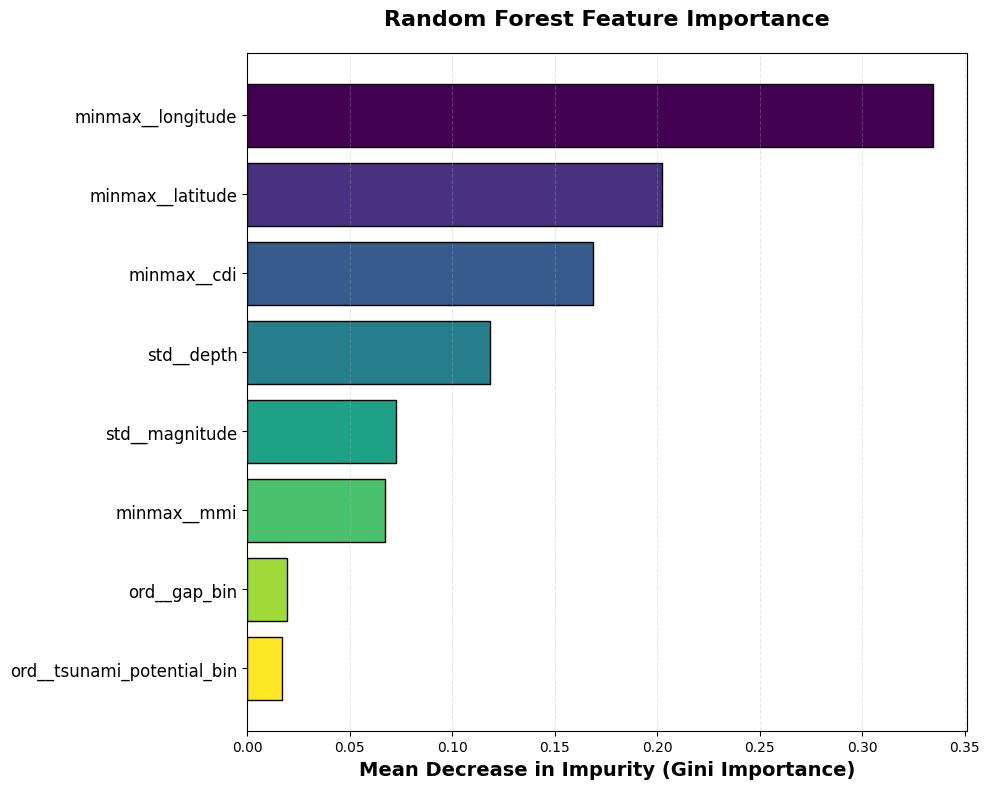

Top 10 Important Features for Random Forest:


,Feature,Importance
2,minmax__longitude,0.334520
3,minmax__latitude,0.202444
5,minmax__cdi,0.168703
6,std__depth,0.118285
7,std__magnitude,0.072669
4,minmax__mmi,0.067156
1,ord__gap_bin,0.019376
0,ord__tsunami_potential_bin,0.016847


In [ ]:
random_seed = 1
best_rf_pipe = best_rf_models[random_seed]

# Extract the fitted RandomForest model and preprocessor from the pipeline
rf_model = best_rf_pipe.named_steps['randomforestclassifier']
fitted_preprocessor = best_rf_pipe.named_steps['columntransformer']

# Get feature names from the fitted preprocessor
feature_names = fitted_preprocessor.get_feature_names_out()

# Get feature importances from the trained model
importances = rf_model.feature_importances_

rf_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
top_n = min(20, len(rf_feature_importance))
top_features = rf_feature_importance.head(top_n)

colors = plt.cm.viridis(np.linspace(0, 1, top_n))

ax.barh(range(top_n), top_features['Importance'], color=colors, edgecolor='black', align='center')
ax.set_yticks(range(top_n))
ax.set_yticklabels(top_features['Feature'], fontsize=12)
ax.invert_yaxis()

ax.set_xlabel('Mean Decrease in Impurity (Gini Importance)', fontsize=14, fontweight='bold')
ax.set_title('Random Forest Feature Importance', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', linestyle='--', alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('../figures/rf_feature_importance.png', dpi=300)
plt.show()

# Display top features
print("Top 10 Important Features for Random Forest:")
display(rf_feature_importance.head(10))

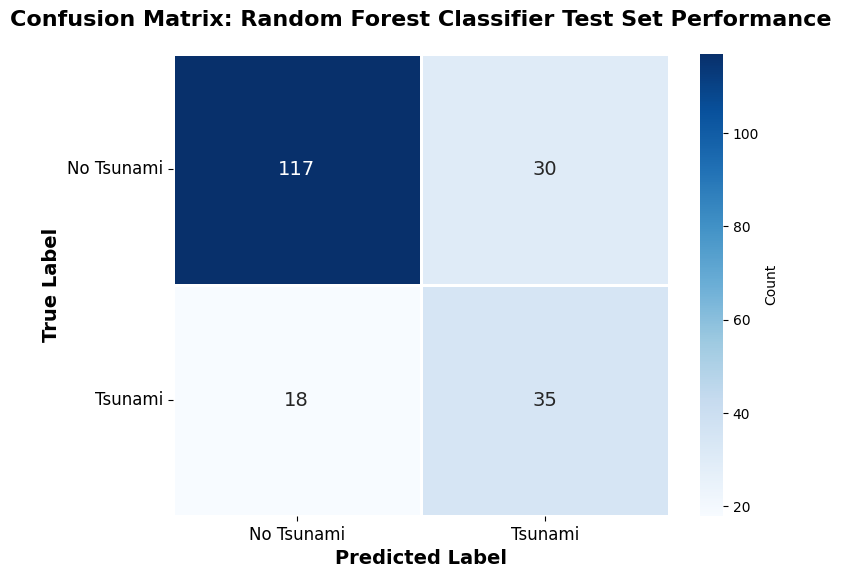

True Negatives: 117
False Positives: 30
False Negatives: 18
True Positives: 35
Specificity (True Negative Rate): 0.7959183673469388
Sensitivity (Recall): 0.660377358490566


In [1602]:
# Load the data from the CSV files
final_y_test = pd.read_csv('../data/processed_results/RF y_test.csv')
final_y_test_pred = pd.read_csv('../data/processed_results/RF y_test_pred.csv')
final_y_test_pred_prob = pd.read_csv('../data/processed_results/RF y_test_pred_prob.csv')

plot_confusion_matrix(final_y_test.iloc[:, 1], final_y_test_pred.iloc[:, 1], classes=['No Tsunami', 'Tsunami'], tag='Random Forest Classifier')

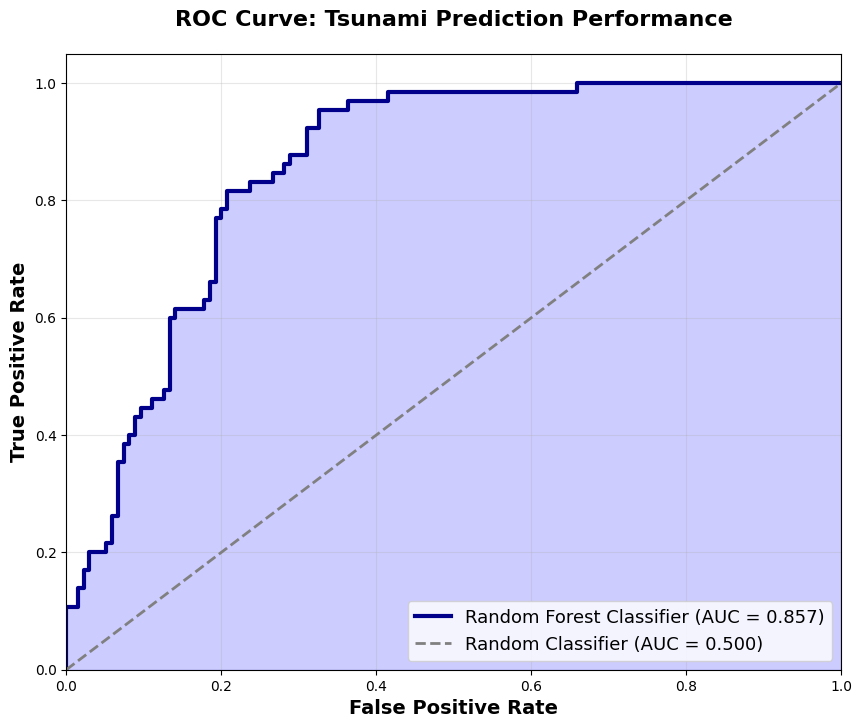

In [1603]:
plot_roc_curve(final_y_test.iloc[:, 1], final_y_test_pred_prob.iloc[:, 1], 'Random Forest Classifier')

## Evaluate All Models on Test Set

Computed Metrics (Mean ± Std):

Baseline:
  Accuracy: 0.6700 ± 0.0000
  Precision: 0.0000 ± 0.0000
  Recall: 0.0000 ± 0.0000
  F1-Score: 0.0000 ± 0.0000

XGBoost:
  Accuracy: 0.7650 ± 0.0270
  Precision: 0.6041 ± 0.0369
  Recall: 0.8262 ± 0.0492
  F1-Score: 0.6961 ± 0.0235

Random Forest:
  Accuracy: 0.7725 ± 0.0270
  Precision: 0.6590 ± 0.0467
  Recall: 0.6262 ± 0.0572
  F1-Score: 0.6409 ± 0.0444

SVC:
  Accuracy: 0.6775 ± 0.0439
  Precision: 0.5042 ± 0.0442
  Recall: 0.7431 ± 0.0596
  F1-Score: 0.6001 ± 0.0470

Logistic Regression:
  Accuracy: 0.6960 ± 0.0232
  Precision: 0.5530 ± 0.0629
  Recall: 0.3708 ± 0.0512
  F1-Score: 0.4410 ± 0.0445


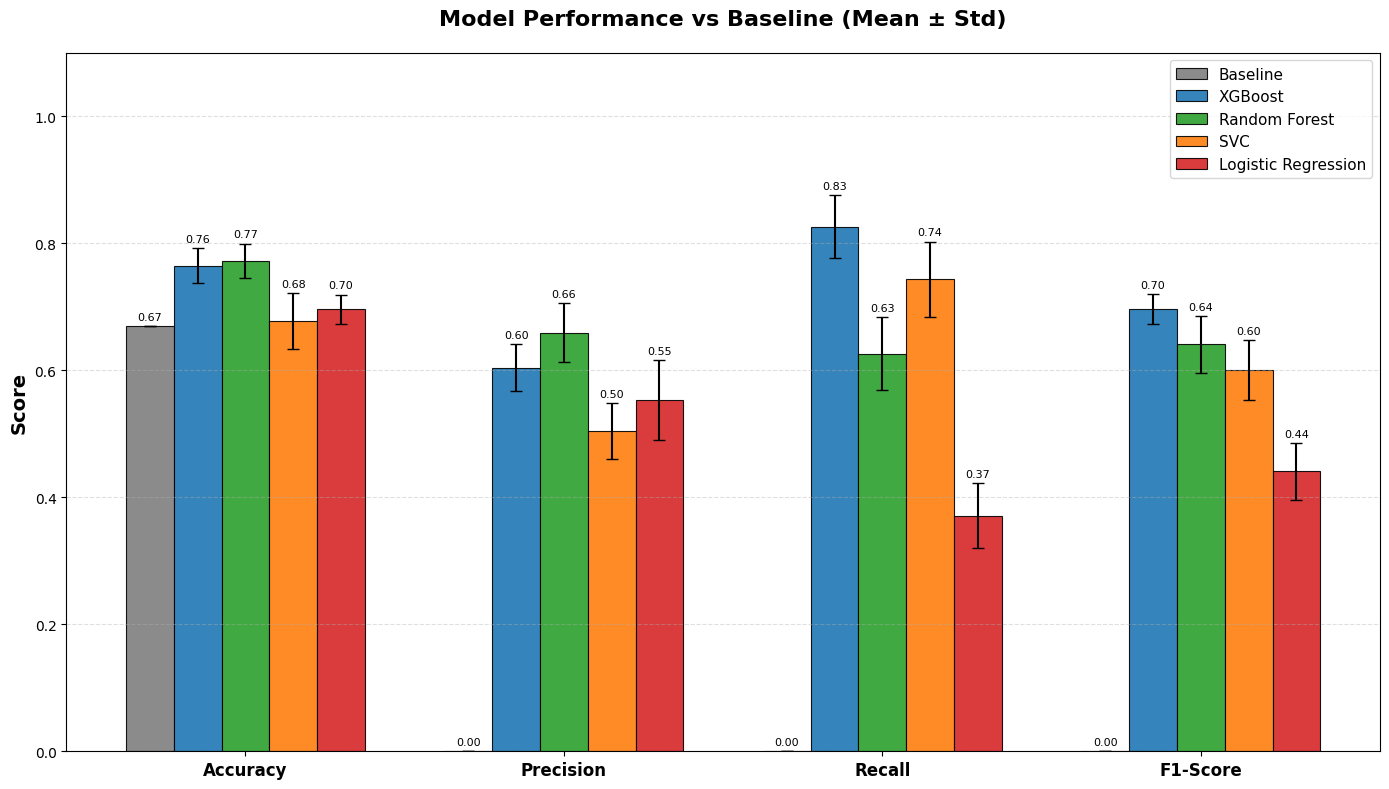

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load saved predictions and compute metrics
model_names = ['XGBoost', 'RF', 'SVC', 'Logreg']
display_names = {'XGBoost': 'XGBoost', 'RF': 'Random Forest', 'SVC': 'SVC', 'Logreg': 'Logistic Regression'}

# Store metrics for each model
all_metrics = {}

for model_name in model_names:
    # Load y_test and y_test_pred
    y_test_df = pd.read_csv(f'../data/processed_results/{model_name} y_test.csv')
    y_pred_df = pd.read_csv(f'../data/processed_results/{model_name} y_test_pred.csv')
    
    # Calculate metrics for each random seed
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    for col in y_test_df.columns:
        y_true = y_test_df[col].values
        y_pred = y_pred_df[col].values
        
        accuracies.append(accuracy_score(y_true, y_pred))
        precisions.append(precision_score(y_true, y_pred, zero_division=0))
        recalls.append(recall_score(y_true, y_pred, zero_division=0))
        f1_scores.append(f1_score(y_true, y_pred, zero_division=0))
    
    display_name = display_names[model_name]
    all_metrics[display_name] = {
        'means': [np.mean(accuracies), np.mean(precisions), np.mean(recalls), np.mean(f1_scores)],
        'stds': [np.std(accuracies), np.std(precisions), np.std(recalls), np.std(f1_scores)]
    }

# Prepare Data
models = ['Baseline', 'XGBoost', 'Random Forest', 'SVC', 'Logistic Regression']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Mean Scores
means = {
    'Baseline': [baseline_accuracy, baseline_precision, baseline_recall, baseline_f1],
    'XGBoost': all_metrics['XGBoost']['means'],
    'Random Forest': all_metrics['Random Forest']['means'],
    'SVC': all_metrics['SVC']['means'],
    'Logistic Regression': all_metrics['Logistic Regression']['means']
}

# Standard Deviations
stds = {
    'Baseline': [0.0, 0.0, 0.0, 0.0],
    'XGBoost': all_metrics['XGBoost']['stds'],
    'Random Forest': all_metrics['Random Forest']['stds'],
    'SVC': all_metrics['SVC']['stds'],
    'Logistic Regression': all_metrics['Logistic Regression']['stds']
}

# Print computed metrics
print("Computed Metrics (Mean ± Std):")
print("=" * 80)
for model in models:
    print(f"\n{model}:")
    for i, metric in enumerate(metrics):
        print(f"  {metric}: {means[model][i]:.4f} ± {stds[model][i]:.4f}")

# Plot Settings
x = np.arange(len(metrics))
width = 0.15
fig, ax = plt.subplots(figsize=(14, 8))

colors = ['#7f7f7f', '#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
# Grey (Base), Blue (XGB), Green (RF), Orange (SVC), Red (LogReg)

# Plot bars for each model
for i, model in enumerate(models):
    offset = width * i
    pos = x - (width * 2.0) + offset
    rects = ax.bar(pos, means[model], width,
                   yerr=stds[model],
                   label=model,
                   color=colors[i],
                   capsize=4,
                   alpha=0.9,
                   edgecolor='black',
                   linewidth=0.8)

    ax.bar_label(rects, padding=3, fmt='%.2f', fontsize=8)

# Create the Chart
ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_title('Model Performance vs Baseline (Mean ± Std)', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12, fontweight='bold')
ax.legend(fontsize=11, loc='upper right')

ax.set_ylim(0.0, 1.1)
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('../figures/model_comparison_with_baseline.png', dpi=300)
plt.show()

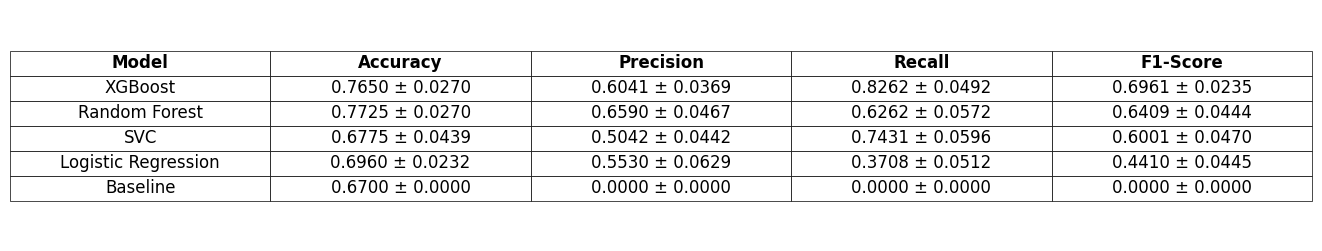

In [1612]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Re-order models to match the desired table format
models_for_table = ['XGBoost', 'Random Forest', 'SVC', 'Logistic Regression', 'Baseline']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Prepare data for the table
table_data = []
for model in models_for_table:
    row = [model]
    # The baseline model's metrics are directly in the means dictionary, not in a list
    if model == 'Baseline':
        row.append(f"{means['Baseline'][0]:.4f} ± {stds['Baseline'][0]:.4f}")
        row.append(f"{means['Baseline'][1]:.4f} ± {stds['Baseline'][1]:.4f}")
        row.append(f"{means['Baseline'][2]:.4f} ± {stds['Baseline'][2]:.4f}")
        row.append(f"{means['Baseline'][3]:.4f} ± {stds['Baseline'][3]:.4f}")
    else:
        for i in range(len(metrics)):
            mean_val = means[model][i]
            std_val = stds[model][i]
            row.append(f"{mean_val:.4f} ± {std_val:.4f}")
    table_data.append(row)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 3)) 
ax.axis('tight')
ax.axis('off')

# Create the table
the_table = ax.table(cellText=table_data,
                     colLabels=['Model'] + metrics,
                     loc='center',
                     cellLoc='center')

# Style the table
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(1.2, 1.5)

# Make header bold and add grid lines
for (i, j), cell in the_table.get_celld().items():
    if i == 0:
        cell.set_text_props(weight='bold')
    cell.set_edgecolor('black')  # Add grid lines
    cell.set_linewidth(0.5)

# Save the figure
plt.savefig('../results/model_performance_table.png', dpi=300, bbox_inches='tight', pad_inches=0.05)
plt.show()

In [ ]:
# Load saved models
import joblib

# Load the best Random Forest model
loaded_rf_model = joblib.load('../results/best_rf_model.joblib')
print("Random Forest model loaded successfully")
print(f"RF Model type: {type(loaded_rf_model)}")

# Load the best XGBoost model
loaded_xgb_model = joblib.load('../results/best_xgb_model.joblib')
print("XGBoost model loaded successfully")
print(f"XGB Model type: {type(loaded_xgb_model)}")